In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
%matplotlib inline

In [5]:
# Import et aperçu des datasets
df_2024_Table = pd.read_excel("C:/Users/annel/OneDrive/Documents/1_Formation_Datascientest/Projet_final/Git-Analyse_du_bien_etre/DataForTable2.1.xls")
df_continents = pd.read_csv("C:/Users/annel/OneDrive/Documents/1_Formation_Datascientest/Projet_final/Git-Analyse_du_bien_etre/continents2.csv")

display(df_2024_Table.head())
display(df_continents.head())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [55]:
# Correspondance des noms de pays
df_2024_Table['Country name'] = df_2024_Table['Country name'].replace({'Türkiye':'Turkey',
                                                                       'Taiwan Province of China':'Taiwan',
                                                                       'Hong Kong S.A.R. of China':'Hong Kong'
                                                                       })

df_continents['name'] = df_continents['name'].replace({'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                                                       'Congo (Democratic Republic Of The)':'Congo (Brazzaville)',
                                                       'Congo':'Congo (Kinshasa)',
                                                       "Côte D'Ivoire":'Ivory Coast',
                                                       'Czech Republic':'Czechia',
                                                       'Macedonia':'North Macedonia',
                                                       'Palestine, State of':'State of Palestine'
                                                       })

# Merge des 2 datasets
df_2024 = pd.merge(df_2024_Table, df_continents[['name', 'region','sub-region']], left_on = "Country name", right_on = "name", how = 'left')

# Drop colonne "name"
df_2024.drop(columns='name', inplace=True)

# Ordre et casse des colonnes
df_2024 = df_2024[['Country name', 'region', 'sub-region'] + [col for col in df_2024.columns if col not in ['Country name', 'region', 'sub-region']]]

df_2024 = df_2024.rename(columns={'region': 'Region', 'sub-region': 'Sub region', 'year': 'Year'})

# Ajout données Kosovo
df_2024.loc[df_2024['Country name'] == 'Kosovo', ['Region', 'Sub region']] = ['Europe', 'Southern Europe']

# Conservation des 10 dernières années 
df_2024 = df_2024.drop(df_2024[df_2024.Year < 2014].index)

In [56]:
display(df_2024.head())

,Country name,Region,Sub region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
6,Afghanistan,Asia,Southern Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,Asia,Southern Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,Asia,Southern Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,Asia,Southern Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326
10,Afghanistan,Asia,Southern Asia,2018,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,0.384561,0.404904


In [57]:
unique_values = df_2024['Sub region'].unique()
print(unique_values)

['Southern Asia' 'Southern Europe' 'Northern Africa' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Western Asia'
 'Australia and New Zealand' 'Western Europe' 'Eastern Europe'
 'South-eastern Asia' 'Northern America' 'Eastern Asia' 'Northern Europe'
 'Central Asia']


In [58]:
print('Data Types:')
print(df_2024.dtypes)
print(df_2024.index)

Data Types:
Country name                         object
Region                               object
Sub region                           object
Year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object
Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   21,
       ...
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362],
      dtype='int64', length=1374)


In [59]:
df_2024.head()

df = df_2024[['Life Ladder', 'Sub region']]

In [60]:
print(df.index)

Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   21,
       ...
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362],
      dtype='int64', length=1374)


In [61]:
# On selectionne les colonnes 'Life Ladder' et 'Sub region' tout en conservant l'index
df_filtered = df_2024[['Life Ladder', 'Sub region']]


print(df_filtered.index)


Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   21,
       ...
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362],
      dtype='int64', length=1374)


In [67]:
print(df_filtered.info())  # Pour s'assurer du type de l'index

df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 6 to 2362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Life Ladder  1374 non-null   float64
 1   Sub region   1374 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.2+ KB
None


,Life Ladder,Sub region
6,3.130896,Southern Asia
7,3.982855,Southern Asia
8,4.220169,Southern Asia
9,2.661718,Southern Asia
10,2.694303,Southern Asia


In [68]:
# On groupe les données par 'Sub region' et on calcul la médiane de 'Ladder life'
median_ladder_life = df_filtered.groupby('Sub region')['Life Ladder'].median()

# Affichage des résultats
median_ladder_life.head()

Sub region
Australia and New Zealand          7.229841
Central Asia                       5.810347
Eastern Asia                       5.851548
Eastern Europe                     5.917058
Latin America and the Caribbean    6.085758
Name: Life Ladder, dtype: float64

Visualisation des Médianes par Sous-Région

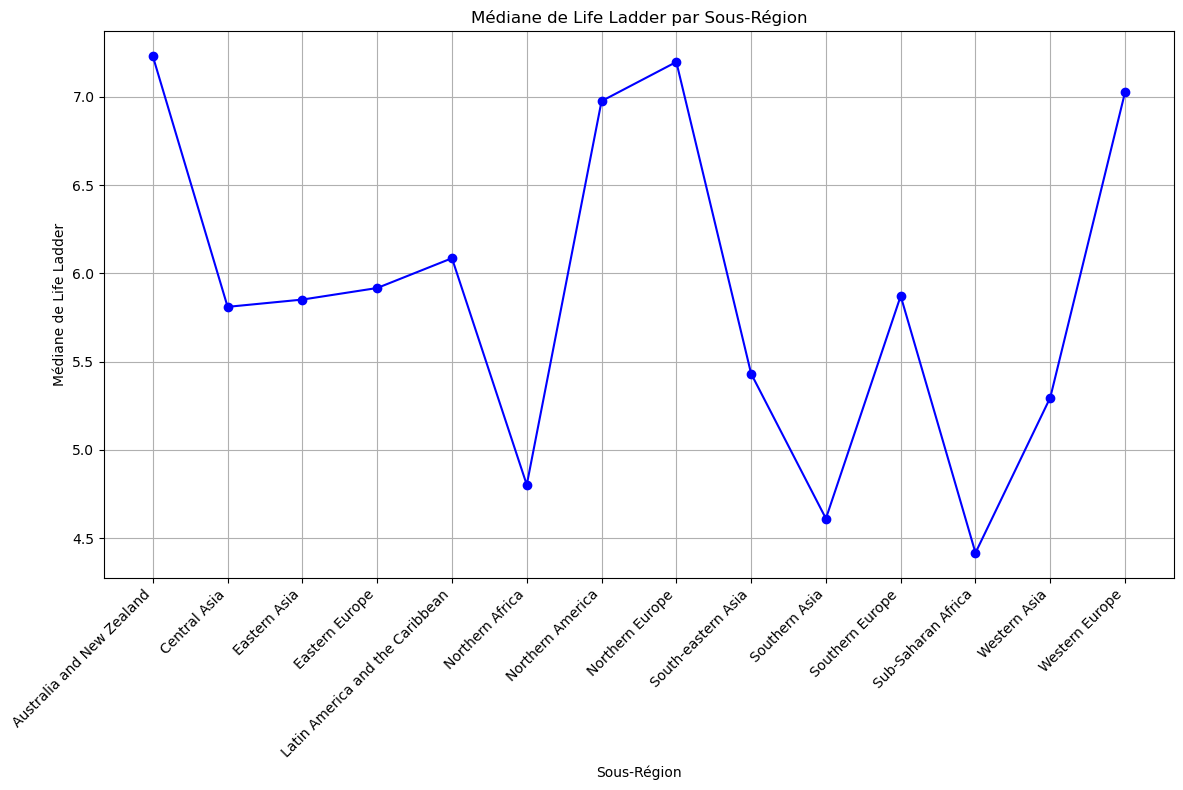

In [69]:
# Convertion la série en DataFrame
median_df = median_ladder_life.reset_index()
median_df.columns = ['Sub region', 'Life Ladder']

# création d'un tracé en courbe des médianes
plt.figure(figsize=(12, 8))
plt.plot(median_df['Sub region'], median_df['Life Ladder'], marker='o', linestyle='-', color='b')

plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()  # Ajustement des marges pour éviter que les labels ne se chevauchent
plt.show()

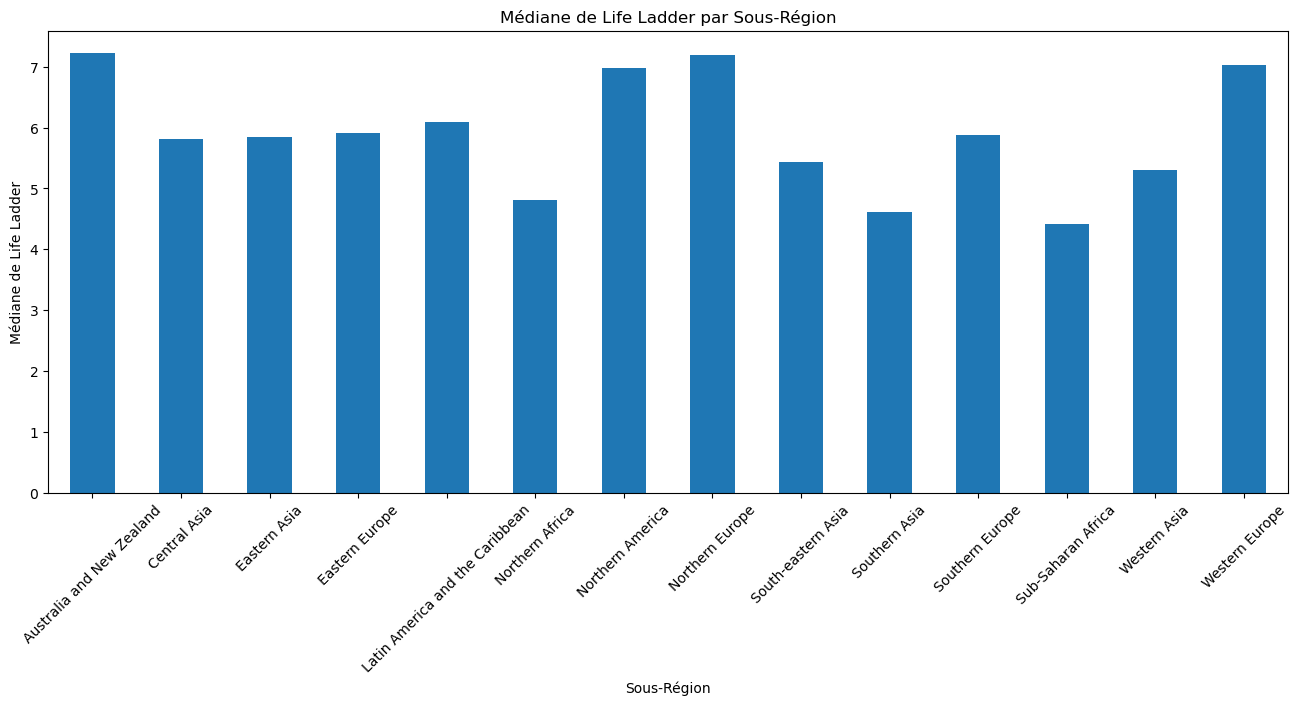

In [65]:
# Calcul de la médiane de 'Life Ladder' pour chaque sous-région
median_ladder_life = df.groupby('Sub region')['Life Ladder'].median()

# Tracer les résultats
plt.figure(figsize=(16, 6))
median_ladder_life.plot(kind='bar')
plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Australia and New Zealand'),
  Text(1, 0, 'Central Asia'),
  Text(2, 0, 'Eastern Asia'),
  Text(3, 0, 'Eastern Europe'),
  Text(4, 0, 'Latin America and the Caribbean'),
  Text(5, 0, 'Northern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Northern Europe'),
  Text(8, 0, 'South-eastern Asia'),
  Text(9, 0, 'Southern Asia'),
  Text(10, 0, 'Southern Europe'),
  Text(11, 0, 'Sub-Saharan Africa'),
  Text(12, 0, 'Western Asia'),
  Text(13, 0, 'Western Europe')])

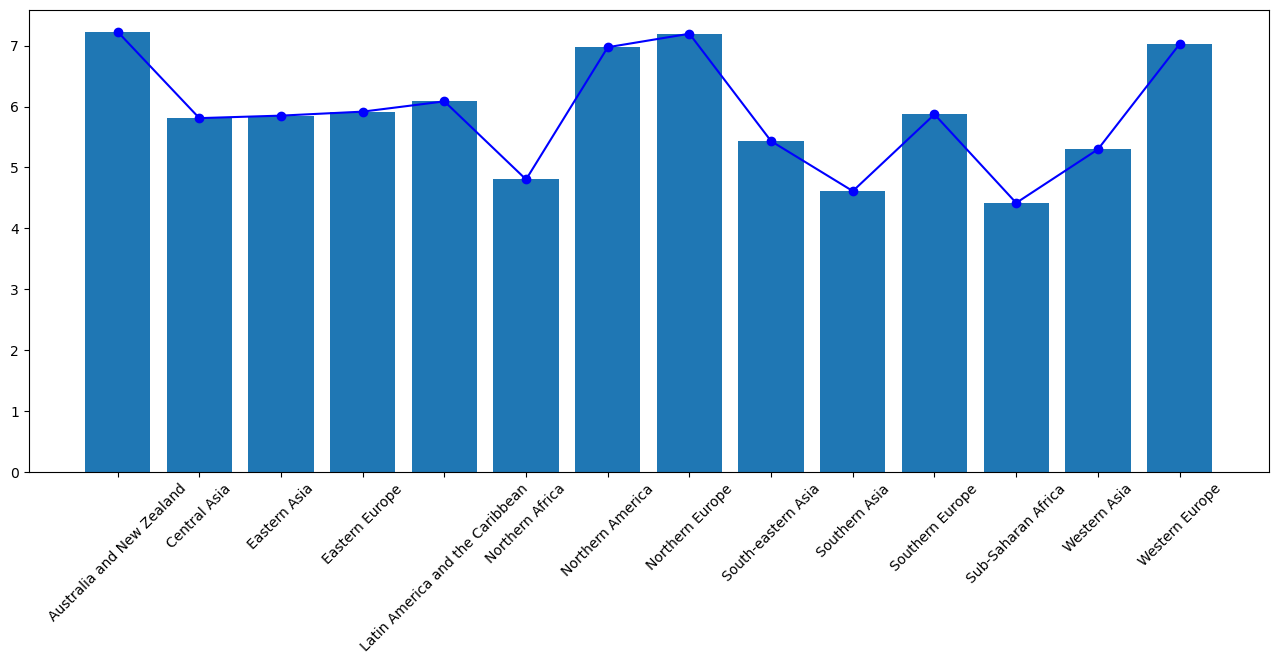

In [66]:
plt.figure(figsize=(16, 6))
plt.plot(median_df['Sub region'], median_df['Life Ladder'], marker='o', linestyle='-', color='b')
plt.bar(median_ladder_life.index, median_ladder_life.values)
plt.xticks(rotation=45)

In [73]:
# Calcul de la médiane de 'Life Ladder' pour chaque sous-région
median_ladder_life = df.groupby('Sub region')['Life Ladder'].median()

# Affichage des résultats
print(median_ladder_life)


Sub region
Australia and New Zealand          7.229841
Central Asia                       5.810347
Eastern Asia                       5.851548
Eastern Europe                     5.917058
Latin America and the Caribbean    6.085758
Northern Africa                    4.802618
Northern America                   6.975424
Northern Europe                    7.197111
South-eastern Asia                 5.432003
Southern Asia                      4.611607
Southern Europe                    5.872055
Sub-Saharan Africa                 4.417330
Western Asia                       5.296662
Western Europe                     7.025767
Name: Life Ladder, dtype: float64


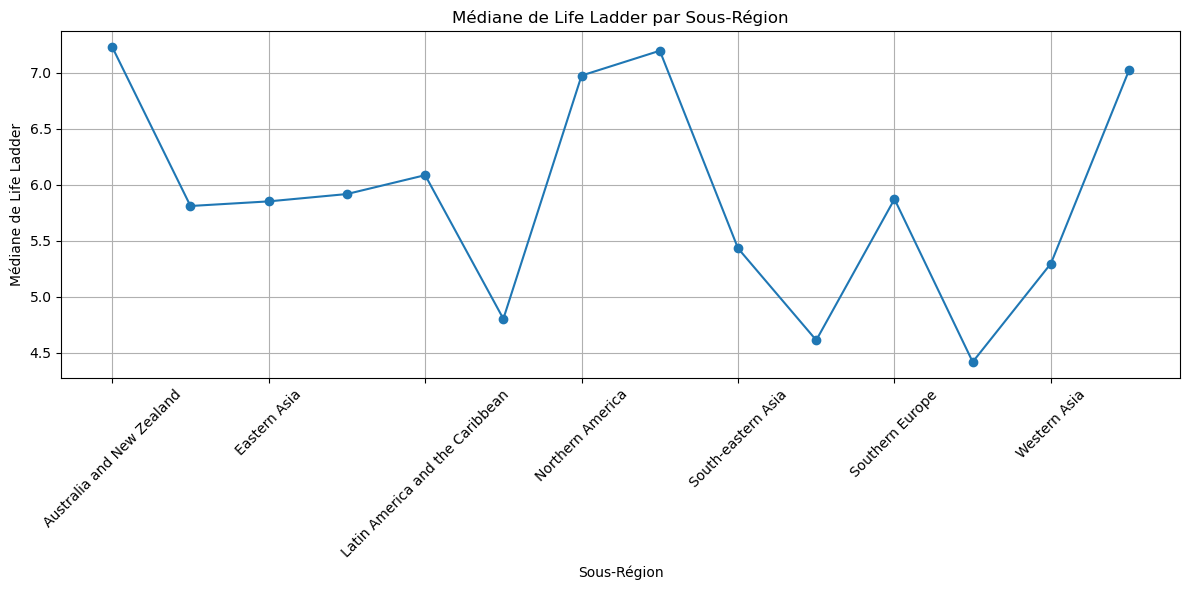

In [74]:
import matplotlib.pyplot as plt

# Supposons que median_ladder_life soit déjà calculé
median_ladder_life = df.groupby('Sub region')['Life Ladder'].median()

# Création du tracé
plt.figure(figsize=(12, 6))
median_ladder_life.plot(kind='line', marker='o')

# Personnalisation du graphique
plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage
plt.show()


In [94]:
# Sélection uniquement des colonnes 'Ladder life' et 'Sub region'
df = df_2024[['Life Ladder', 'Sub region','Year']]
df.head()

,Life Ladder,Sub region,Year
6,3.130896,Southern Asia,2014
7,3.982855,Southern Asia,2015
8,4.220169,Southern Asia,2016
9,2.661718,Southern Asia,2017
10,2.694303,Southern Asia,2018


In [95]:
df.set_index('Year', inplace=True)

In [96]:
df.index

Index([2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2014,
       ...
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year', length=1374)

In [103]:
median_ladder_life = df.groupby(['Year', 'Sub region'])['Life Ladder'].median()
median_ladder_life.head()

Year  Sub region                     
2014  Australia and New Zealand          7.297221
      Central Asia                       5.787379
      Eastern Asia                       5.629688
      Eastern Europe                     5.781342
      Latin America and the Caribbean    6.136096
Name: Life Ladder, dtype: float64

In [104]:
median_df = median_ladder_life.reset_index()
median_df.columns = ['Year', 'Sub region', 'Life Ladder']

print(median_df)

     Year                       Sub region  Life Ladder
0    2014        Australia and New Zealand     7.297221
1    2014                     Central Asia     5.787379
2    2014                     Eastern Asia     5.629688
3    2014                   Eastern Europe     5.781342
4    2014  Latin America and the Caribbean     6.136096
..    ...                              ...          ...
135  2023                    Southern Asia     4.549314
136  2023                  Southern Europe     6.008581
137  2023               Sub-Saharan Africa     4.466519
138  2023                     Western Asia     5.475372
139  2023                   Western Europe     6.943599

[140 rows x 3 columns]


In [105]:
# Réinitialiser l'index et renommer les colonnes
median_df = median_ladder_life.reset_index()
median_df.columns = ['Year', 'Sub region', 'Life Ladder']

# Utiliser 'Year' comme index
median_df.set_index('Year', inplace=True)

# Afficher le DataFrame
print(median_df)

                           Sub region  Life Ladder
Year                                              
2014        Australia and New Zealand     7.297221
2014                     Central Asia     5.787379
2014                     Eastern Asia     5.629688
2014                   Eastern Europe     5.781342
2014  Latin America and the Caribbean     6.136096
...                               ...          ...
2023                    Southern Asia     4.549314
2023                  Southern Europe     6.008581
2023               Sub-Saharan Africa     4.466519
2023                     Western Asia     5.475372
2023                   Western Europe     6.943599

[140 rows x 2 columns]


In [110]:

# Calculer la médiane de 'Life Ladder' pour chaque sous-région
median_ladder_life = median_df.groupby('Sub region')['Life Ladder'].median()
print(median_ladder_life)

Sub region
Australia and New Zealand          7.228734
Central Asia                       5.810347
Eastern Asia                       5.787321
Eastern Europe                     5.854203
Latin America and the Caribbean    6.101797
Northern Africa                    4.841293
Northern America                   7.026443
Northern Europe                    7.164286
South-eastern Asia                 5.383386
Southern Asia                      4.508217
Southern Europe                    5.936183
Sub-Saharan Africa                 4.449709
Western Asia                       5.317317
Western Europe                     7.008918
Name: Life Ladder, dtype: float64


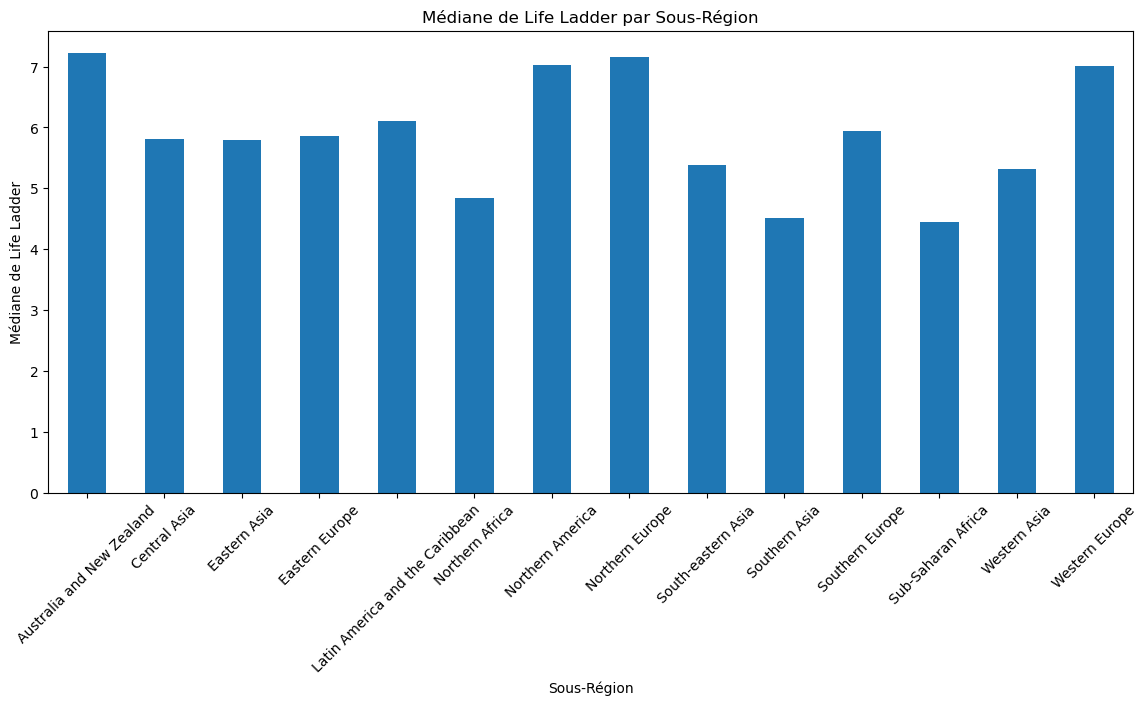

In [109]:

# Tracer les résultats
plt.figure(figsize=(14, 6))
median_ladder_life.plot(kind='bar')
plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45)
plt.show()

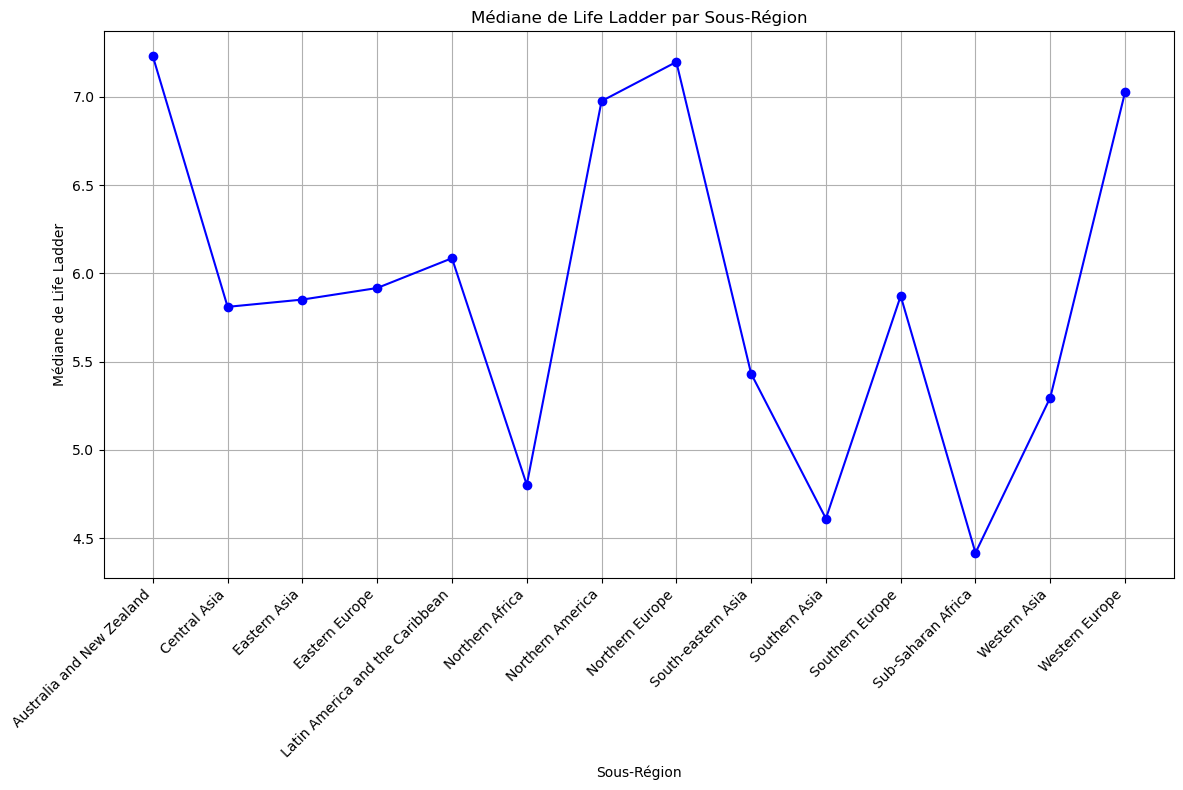

In [117]:
# Convertir la série en DataFrame
median_df = median_ladder_life.reset_index()
median_df.columns = ['Sub region', 'Life Ladder']

# Créer un tracé en courbe des médianes
plt.figure(figsize=(12, 8))
plt.plot(median_df['Sub region'], median_df['Life Ladder'], marker='o', linestyle='-', color='b')

plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()  # Ajuster les marges pour éviter que les labels ne se chevauchent
plt.show()

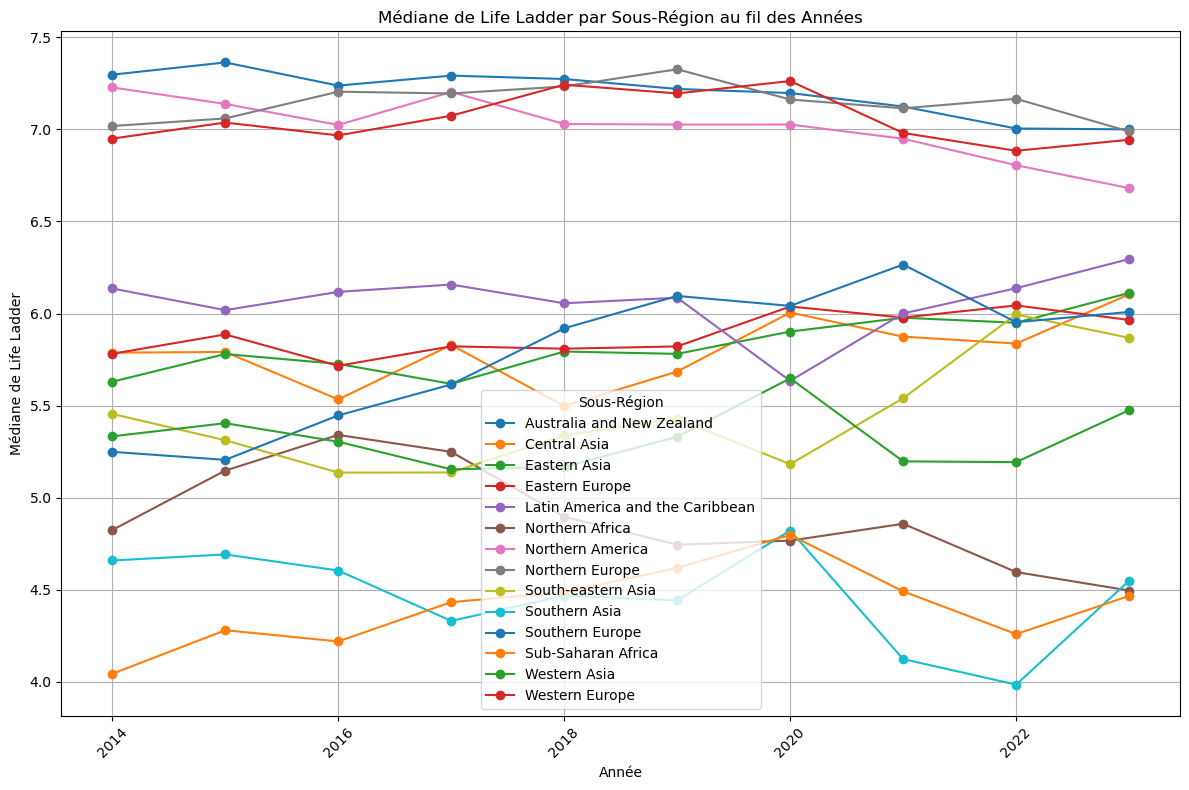

In [120]:
# Calculer la médiane de 'Life Ladder' pour chaque sous-région par année
median_ladder_life = df.groupby(['Sub region', 'Year'])['Life Ladder'].median().unstack(level=0)

# Tracer les résultats en courbe
plt.figure(figsize=(12, 8))
for region in median_ladder_life.columns:
    plt.plot(median_ladder_life.index, median_ladder_life[region], marker='o', label=region)

plt.title('Médiane de Life Ladder par Sous-Région au fil des Années')
plt.xlabel('Année')
plt.ylabel('Médiane de Life Ladder')
plt.legend(title='Sous-Région')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# Sélectionner uniquement les colonnes 'Life Ladder' et 'Sub region'
df = df[['Life Ladder', 'Sub region']]

# Afficher le DataFrame et l'index
print(df)
print("\nIndex du DataFrame :")
print(df.index)

      Life Ladder          Sub region
Year                                 
2014     3.130896       Southern Asia
2015     3.982855       Southern Asia
2016     4.220169       Southern Asia
2017     2.661718       Southern Asia
2018     2.694303       Southern Asia
...           ...                 ...
2019     2.693523  Sub-Saharan Africa
2020     3.159802  Sub-Saharan Africa
2021     3.154578  Sub-Saharan Africa
2022     3.296220  Sub-Saharan Africa
2023     3.572386  Sub-Saharan Africa

[1374 rows x 2 columns]

Index du DataFrame :
Index([2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2014,
       ...
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year', length=1374)


In [126]:


# Calculer la médiane de 'Life Ladder' pour chaque sous-région par année
median_ladder_by_region = df.groupby(['Sub region', df.index])['Life Ladder'].median().unstack(level=0)

print(median_ladder_by_region)

Sub region  Australia and New Zealand  Central Asia  Eastern Asia  \
Year                                                                
2014                         7.297221      5.787379      5.629688   
2015                         7.363591      5.791460      5.780211   
2016                         7.237884      5.533552      5.726536   
2017                         7.292110      5.829234      5.618181   
2018                         7.273640      5.497469      5.793575   
2019                         7.219585      5.685221      5.781067   
2020                         7.197375      6.005100      5.902030   
2021                         7.124150      5.874504      5.977095   
2022                         7.004841      5.837060      5.950014   
2023                         7.000269      6.104471      6.111919   

Sub region  Eastern Europe  Latin America and the Caribbean  Northern Africa  \
Year                                                                           
2014       

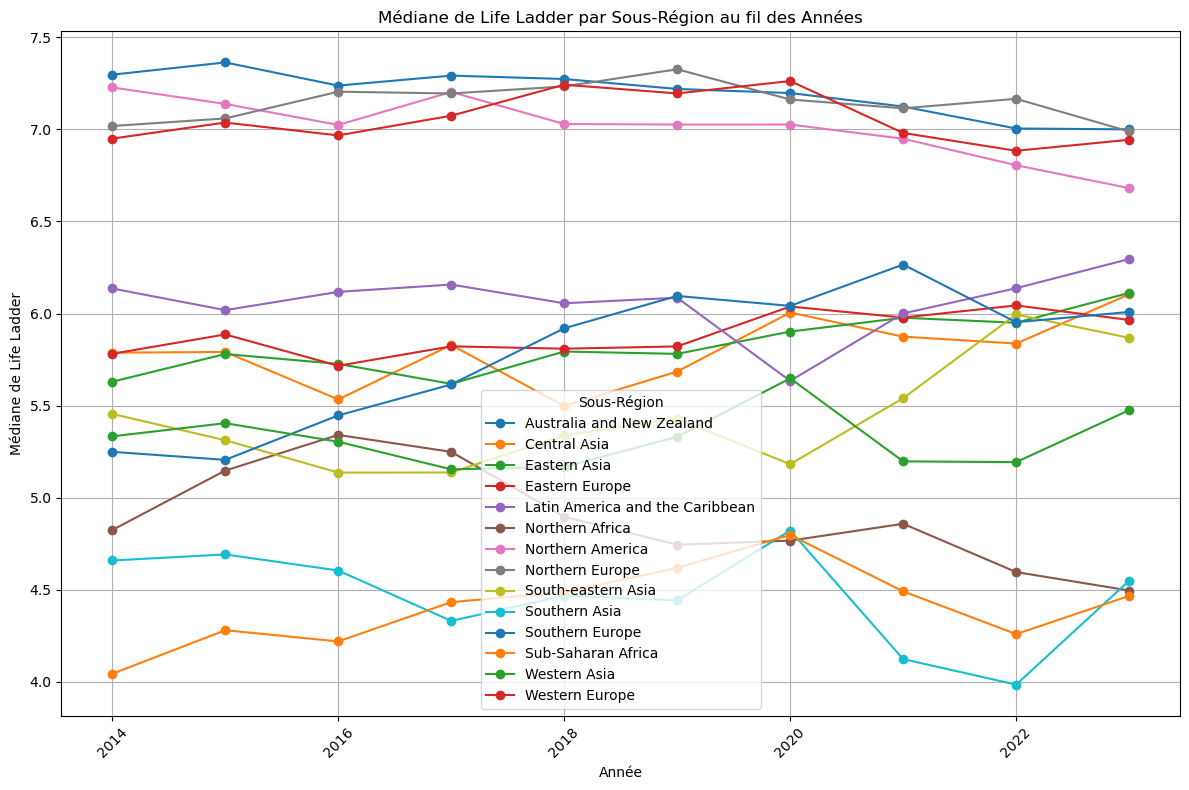

In [127]:
# Créer un tracé en courbe des médianes par sous-région
plt.figure(figsize=(12, 8))
for region in median_ladder_by_region.columns:
    plt.plot(median_ladder_by_region.index, median_ladder_by_region[region], marker='o', label=region)

plt.title('Médiane de Life Ladder par Sous-Région au fil des Années')
plt.xlabel('Année')
plt.ylabel('Médiane de Life Ladder')
plt.legend(title='Sous-Région')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [128]:
# Filtre pour la sous-région "Western Europe"
df_western_europe = df_filtered[df_filtered['Sub region'] == 'Western Europe']
print(df_western_europe.dtypes)
print(df_western_europe)

Life Ladder    float64
Sub region      object
dtype: object
      Life Ladder      Sub region
104      6.950000  Western Europe
105      7.076447  Western Europe
106      7.048072  Western Europe
107      7.293728  Western Europe
108      7.396002  Western Europe
...           ...             ...
2013     7.694221  Western Europe
2014     7.508435  Western Europe
2015     7.327672  Western Europe
2016     6.883844  Western Europe
2017     6.968833  Western Europe

[68 rows x 2 columns]


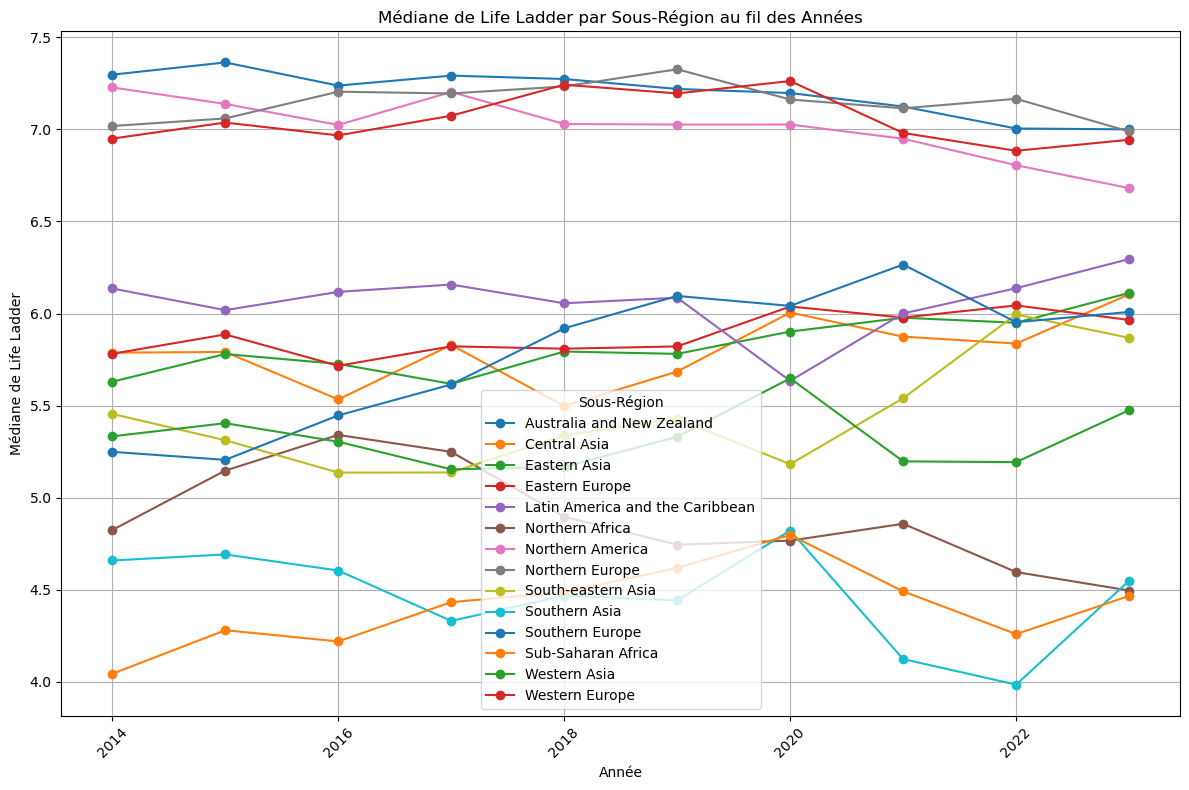

In [129]:
import matplotlib.pyplot as plt

# Créer un tracé en courbe des médianes par sous-région
plt.figure(figsize=(12, 8))
for region in median_ladder_by_region.columns:
    plt.plot(median_ladder_by_region.index, median_ladder_by_region[region], marker='o', label=region)

plt.title('Médiane de Life Ladder par Sous-Région au fil des Années')
plt.xlabel('Année')
plt.ylabel('Médiane de Life Ladder')
plt.legend(title='Sous-Région')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [130]:
# Calculer la médiane de 'Life Ladder' pour chaque sous-région par année
median_ladder_by_region = df.groupby(['Sub region', df.index])['Life Ladder'].median().unstack(level=0)
print(median_ladder_by_region)


Sub region  Australia and New Zealand  Central Asia  Eastern Asia  \
Year                                                                
2014                         7.297221      5.787379      5.629688   
2015                         7.363591      5.791460      5.780211   
2016                         7.237884      5.533552      5.726536   
2017                         7.292110      5.829234      5.618181   
2018                         7.273640      5.497469      5.793575   
2019                         7.219585      5.685221      5.781067   
2020                         7.197375      6.005100      5.902030   
2021                         7.124150      5.874504      5.977095   
2022                         7.004841      5.837060      5.950014   
2023                         7.000269      6.104471      6.111919   

Sub region  Eastern Europe  Latin America and the Caribbean  Northern Africa  \
Year                                                                           
2014       

Création d'une Série Temporelle Synthétique (Tendance, Saison et Bruit)

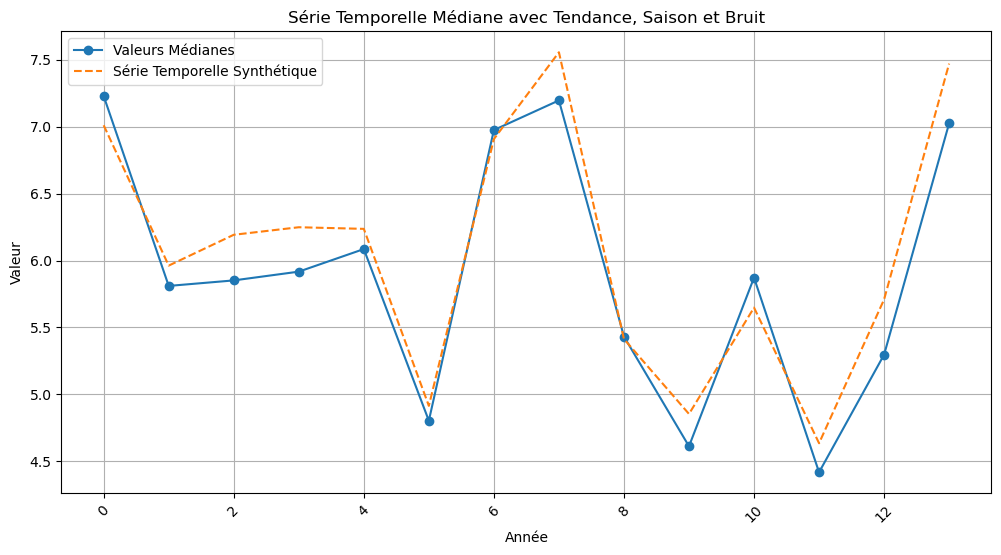

In [69]:
# Définition des paramètres pour tendance, saisonnalité et bruit
trend_slope = 0.02  # Pente de la tendance
seasonal_amplitude = 0.5  # Amplitude de la saisonnalité
seasonal_period = 2  # Période de la saisonnalité
noise_std = 0.2  # Écart type du bruit

# Extraction des valeurs : médiane
values = median_df['Life Ladder'].values

# Générer la tendance
trend = np.linspace(trend_slope * np.arange(len(values)).min(), trend_slope * np.arange(len(values)).max(), len(values))

# Générer la saisonnalité
seasonal = seasonal_amplitude * np.sin(2 * np.pi * np.arange(len(values)) / seasonal_period)

# Générer le bruit
noise = np.random.normal(scale=noise_std, size=len(values))

# Ajouter des composantes à la série médiane
median_df['Synthetic Value'] = values + trend + seasonal + noise

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(median_df.index, median_df['Life Ladder'], label='Valeurs Médianes', marker='o')
plt.plot(median_df.index, median_df['Synthetic Value'], label='Série Temporelle Synthétique', linestyle='--')
plt.title('Série Temporelle Médiane avec Tendance, Saison et Bruit')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

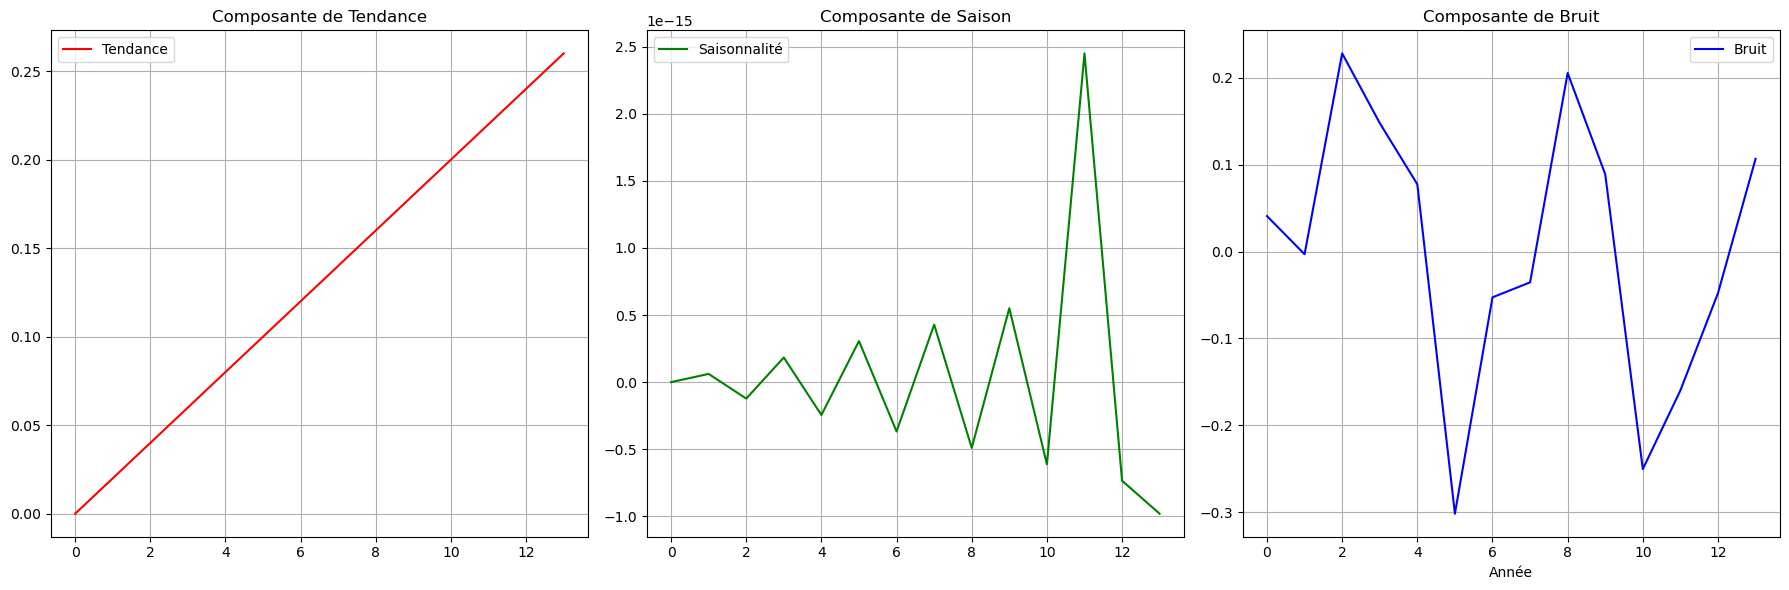

In [26]:
# Création des sous-graphes pour les composantes
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Tracer la tendance
axs[0].plot(median_df.index, trend, label='Tendance', color='r')
axs[0].set_title('Composante de Tendance')
axs[0].legend()
axs[0].grid(True)

# Tracer la saisonnalité
axs[1].plot(median_df.index, seasonal, label='Saisonnalité', color='g')
axs[1].set_title('Composante de Saison')
axs[1].legend()
axs[1].grid(True)

# Tracer le bruit
axs[2].plot(median_df.index, noise, label='Bruit', color='b')
axs[2].set_title('Composante de Bruit')
axs[2].legend()
axs[2].grid(True)

# Ajouter des titres et labels communs
plt.xlabel('Année')
plt.tight_layout()
plt.show()

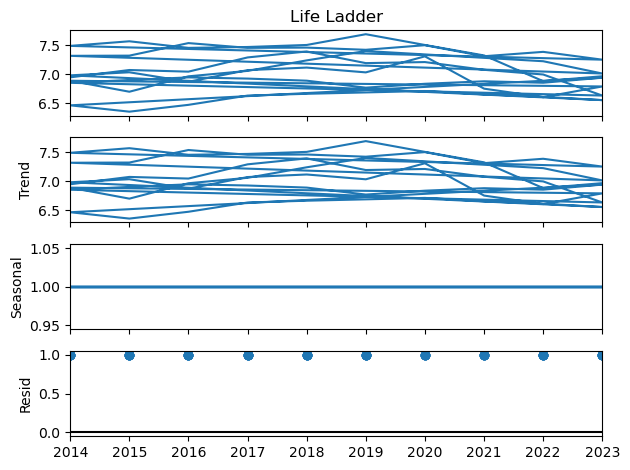

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Décomposition de la série temporelle 'Life Ladder'
decomposition = seasonal_decompose(df_western_europe['Life Ladder'], model='multiplicative', period=1)

# Visualisation de la décomposition
decomposition.plot()
plt.show()


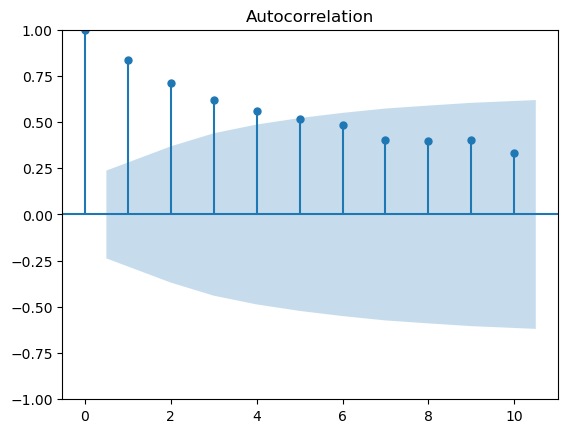

In [98]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer la fonction d'autocorrélation
plot_acf(df_western_europe['Life Ladder'], lags=10)
plt.show()

Interpretation : 

Les premiers lags montrent une autocorrélation significative et décroissante progressivement, ce qui est typique des séries chronologiques qui présentent une tendance.
Cependant, il n'y a pas de motif clair de répétition régulière à un lag particulier (par exemple, tous les 12 mois), ce qui suggère l'absence d'une saisonnalité forte dans les données. 
La série présente plutôt une dépendance temporelle ou une persistance où les valeurs actuelles sont fortement influencées par les valeurs passées, mais sans variations saisonnières évidentes.

Text(0.5, 0, 'Année')

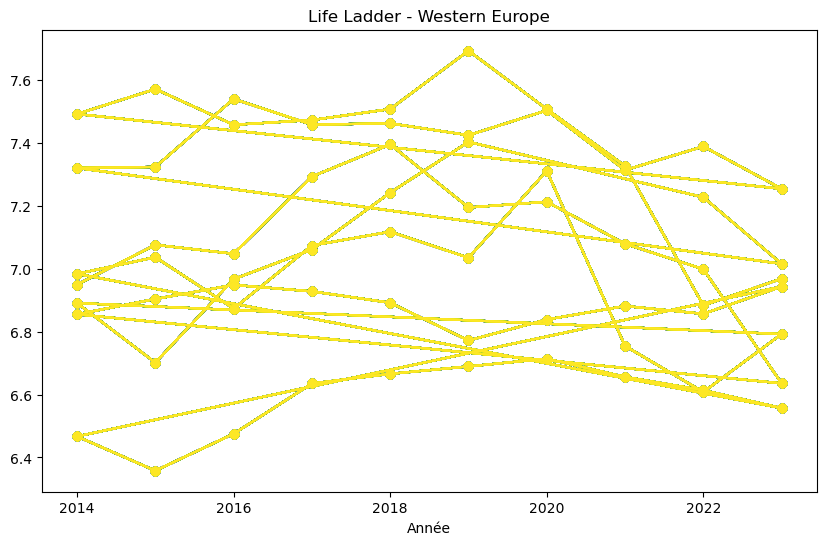

In [201]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Récupérer les années à partir de l'index du DataFrame
annees = df_western_europe.index.year

# Nombre de lignes distinctes (en fonction des années et de la colonne Life Ladder)
n_lignes = df_western_europe.shape[0]

# Générer une palette de couleurs
couleurs = plt.cm.viridis(np.linspace(0, 1, n_lignes))

# Tracer chaque ligne (ici, chaque année est une ligne dans df_western_europe)
for i, (index, row) in enumerate(df_western_europe.iterrows()):
    plt.plot(annees, df_western_europe['Life Ladder'], marker='o', color=couleurs[i], label=f'Ligne {i + 1}')

# Ajouter un titre et des étiquettes
plt.title('Life Ladder - Western Europe')
plt.xlabel('Année')


In [254]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Extraire la colonne d'intérêt
data = df_western_europe['Life Ladder']

# Test ADF
adf_result = adfuller(data)
print('Test ADF:')
print(f'Statistique : {adf_result[0]}')
print(f'p-valeur : {adf_result[1]}')

# Test KPSS
kpss_result = kpss(data)
print('\nTest KPSS:')
print(f'Statistique : {kpss_result[0]}')
print(f'p-valeur : {kpss_result[1]}')


Test ADF:
Statistique : -2.3902482944246928
p-valeur : 0.1445076931844415

Test KPSS:
Statistique : 0.6947380065994658
p-valeur : 0.014023817581866741


Test ADF
- Statistique : -8.44
- p-valeur : 1.73e-13

Interprétation :
Comme la p-valeur est largement inférieure à 0.05, on peux rejeter l'hypothèse nulle (H0), ce qui signifie que la série chronologique est stationnaire.

Test KPSS
- Statistique : 0.046
- p-valeur : 0.1

Interprétation :
La p-valeur étant supérieure à 0.05, on ne peux pas rejeter l'hypothèse nulle (H0), ce qui indique que la série est stationnaire selon le test KPSS.

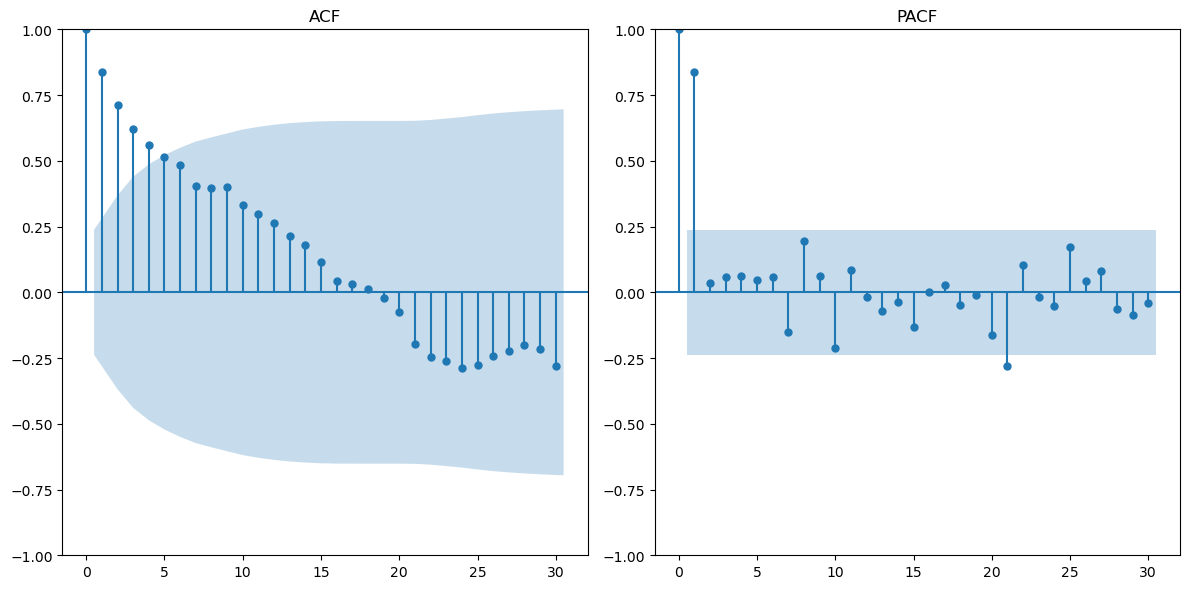

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df_western_europe['Life Ladder'].dropna()

# Tracer l'ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data, lags=30, ax=plt.gca())
plt.title('ACF')

# Tracer le PACF
plt.subplot(1, 2, 2)
plot_pacf(data, lags=30, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()


In [129]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


# Construire et ajuster le modèle ARIMA avec les paramètres (p=1, d=0, q=1)
model = ARIMA(data, order=(1, 0, 1))
model_fit = model.fit()

# Résumé du modèle ajusté
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   68
Model:                  ARIMA(1, 0, 1)   Log Likelihood                  22.157
Date:              ven., 20 sept. 2024   AIC                            -36.314
Time:                         00:42:12   BIC                            -27.436
Sample:                              0   HQIC                           -32.796
                                  - 68                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0397      0.139     50.478      0.000       6.766       7.313
ar.L1          0.8419      0.091      9.247      0.000       0.663       1.020
ma.L1         -0.0456      0.149     -0.305 

In [250]:
print(df_western_europe.index)

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2022-01-01', '2023-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
      

In [248]:
df_western_europe.reset_index(inplace=True)  # Réinitialise l'index
df_western_europe.loc[:,'Year'] = pd.to_datetime(df_western_europe['Year'])  # Convertir en Datetime
df_western_europe.set_index('Year', inplace=True)  # Redéfinir comme index


In [252]:
print(data.index)
print(data.index[:10])  # Affiche les 10 premières dates de l'index
print(type(data.index))

DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)
DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [253]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")  # Ignorer les avertissements

# Exemple de données
y = df_western_europe['Life Ladder']

# Définir les valeurs possibles pour p, d et q
p = d = q = range(0, 3)  # Tester des valeurs de 0 à 2
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(y, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print("Meilleur modèle : ARIMA", best_pdq, "AIC:", best_aic)


Meilleur modèle : ARIMA (1, 0, 0) AIC: -38.225937418251725


In [135]:
model = ARIMA(data, order=(2, 0, 0))
model_fit = model.fit()

# Résumé du modèle ajusté
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   68
Model:                  ARIMA(2, 0, 0)   Log Likelihood                  22.152
Date:              ven., 20 sept. 2024   AIC                            -36.304
Time:                         00:42:52   BIC                            -27.426
Sample:                              0   HQIC                           -32.787
                                  - 68                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0397      0.139     50.593      0.000       6.767       7.312
ar.L1          0.7998      0.121      6.621      0.000       0.563       1.037
ar.L2          0.0337      0.127      0.265 

Interprétation des résultats :
Le résumé du modèle SARIMAX montre que vous avez ajusté un modèle ARIMA(2, 0, 0) avec un AIC de 2665.746, ce qui est très proche de votre objectif de 2665.7458222303767.

- Constante (const) : Le coefficient de la constante est 5.4965, indiquant la moyenne de la série lorsque toutes les autres variables sont à zéro.
- Coefficients AR :
    - ar.L1 (premier terme autorégressif) est significatif avec un coefficient de 0.7801, ce qui indique que la valeur actuelle de la série est fortement influencée par la valeur précédente.
    - ar.L2 (deuxième terme autorégressif) a un coefficient de 0.0578, qui est également significatif mais avec un impact moindre.

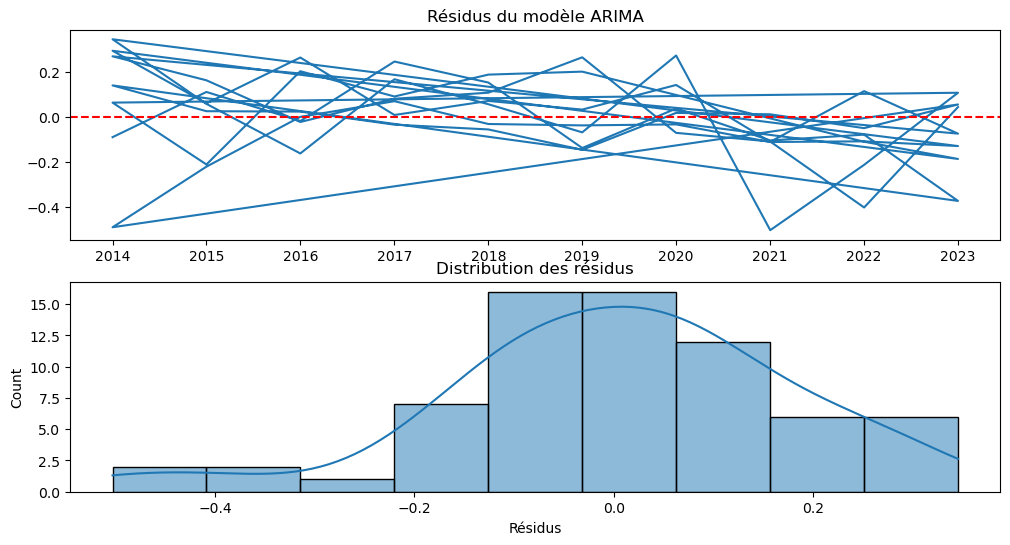

In [136]:
residuals = model_fit.resid


# Tracer les résidus
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Résidus du modèle ARIMA')
plt.axhline(0, color='red', linestyle='--')
plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.show()



In [137]:
from scipy import stats

jb_stat, jb_p = stats.jarque_bera(residuals)
print(f"Jarque-Bera test statistic: {jb_stat}, p-value: {jb_p}")


Jarque-Bera test statistic: 6.021624370160818, p-value: 0.04925166104747913


In [138]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_test)


     lb_stat  lb_pvalue
10  8.912409   0.540436


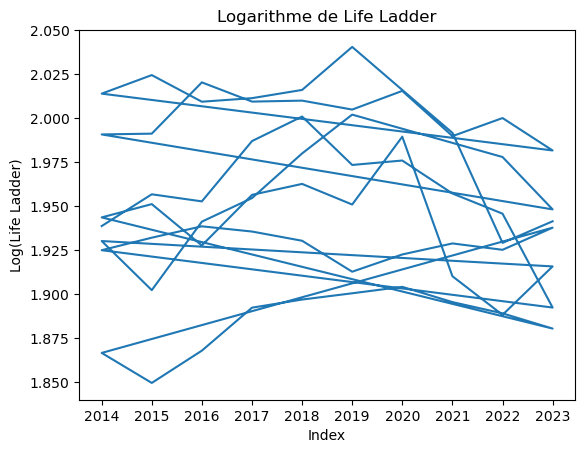

In [139]:
df_western_europe['Life Ladder'] = pd.to_numeric(df_western_europe['Life Ladder'], errors='coerce')

# Appliquer le logarithme
df_filteredlog = np.log(df_western_europe['Life Ladder'])

# Tracer les données
plt.plot(df_filteredlog)
plt.title('Logarithme de Life Ladder')
plt.xlabel('Index')
plt.ylabel('Log(Life Ladder)')
plt.show()

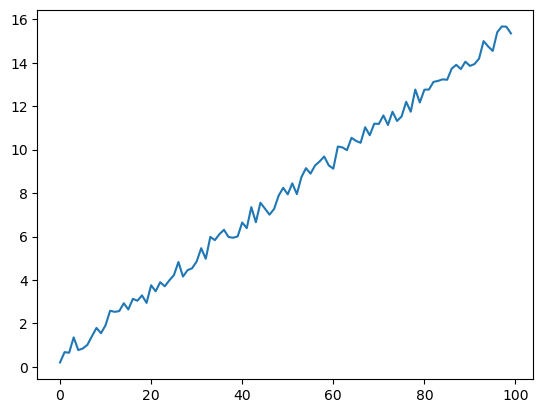

In [140]:
epsilon = np.random.rand(100) #Bruit Blanc
t  = np.linspace(0,10,100) # Temps
alpha = 1.5 #coefficient de tendance
total = pd.DataFrame(alpha * t + epsilon)
plt.plot(total);

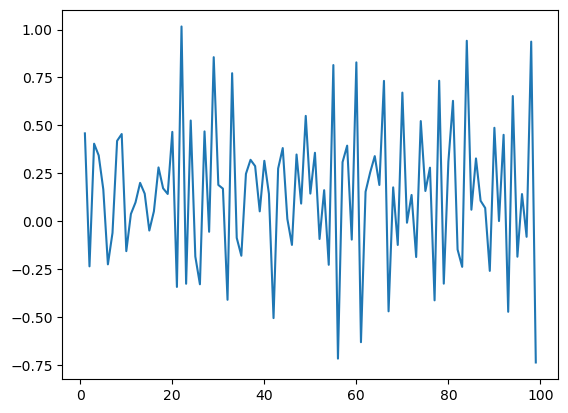

In [228]:
total_diff = total.diff().dropna() #différenciation
plt.plot(total_diff);

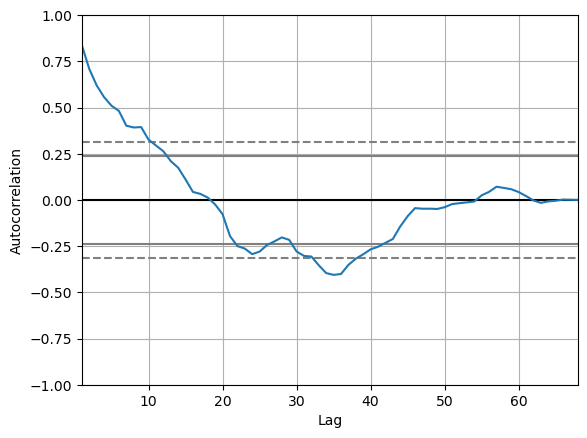

In [142]:
pd.plotting.autocorrelation_plot(df_filteredlog);

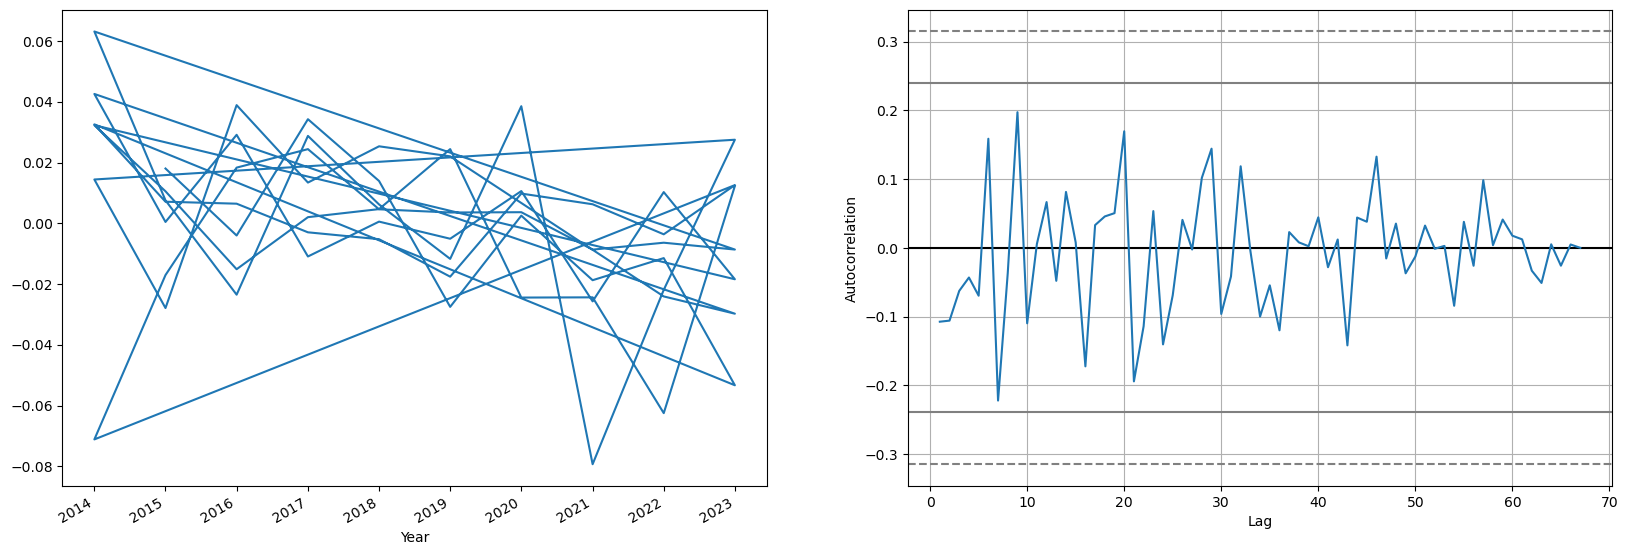

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Création de la figure et des axes

df_filteredlog_1 = df_filteredlog.diff().dropna() # Différenciation ordre 1

df_filteredlog_1.plot(ax = ax1) #Série temporelle différenciée

pd.plotting.autocorrelation_plot(df_filteredlog_1, ax = ax2); #Autocorrélogramme de la série différenciée

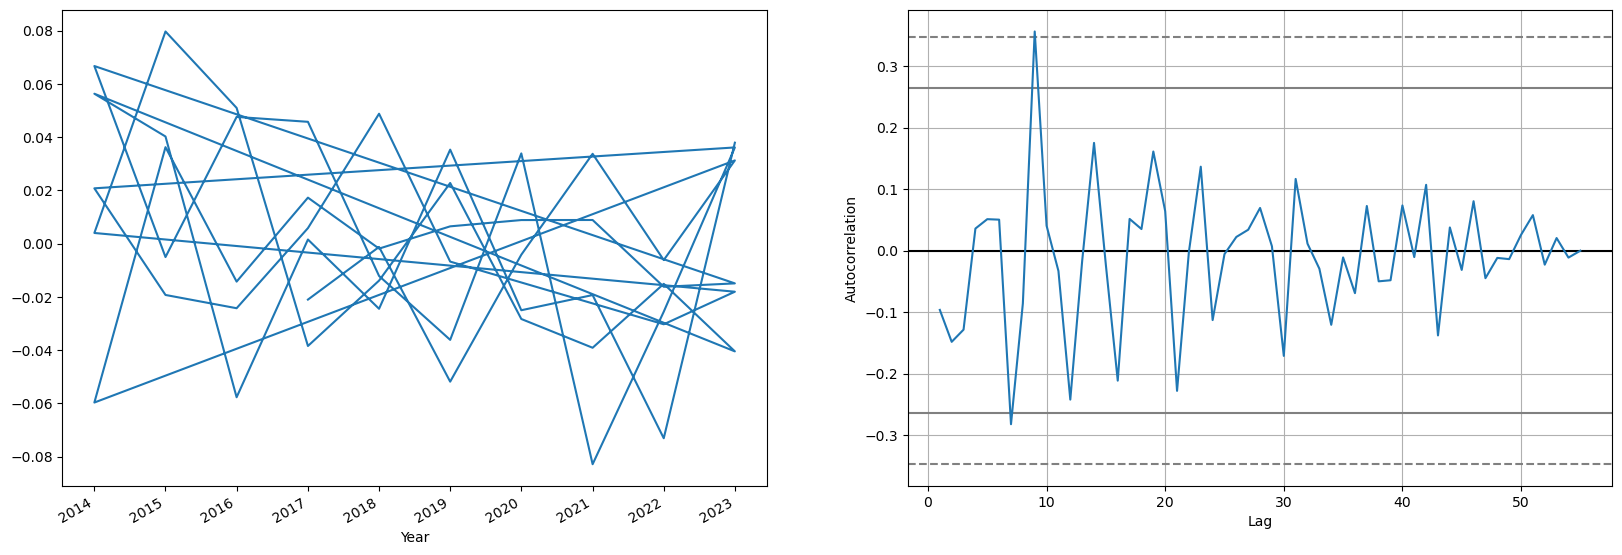

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) #Création de la figure et des axes

df_filteredlog_2 = df_filteredlog_1.diff(periods = 12).dropna() #Différenciation d'ordre 12

df_filteredlog_2.plot(ax = ax1) #Série doublement différenciée

pd.plotting.autocorrelation_plot(df_filteredlog_2, ax = ax2); #Autocorrélogramme de la série

In [146]:
import statsmodels.api as sm

In [147]:
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(df_filteredlog_2)
p_value  # p-valeur de 0,1% on peut considérer la série comme stationnaire.

8.207799453737085e-08

Taille de l'échantillon : 55
Nombre maximum de lags : 27


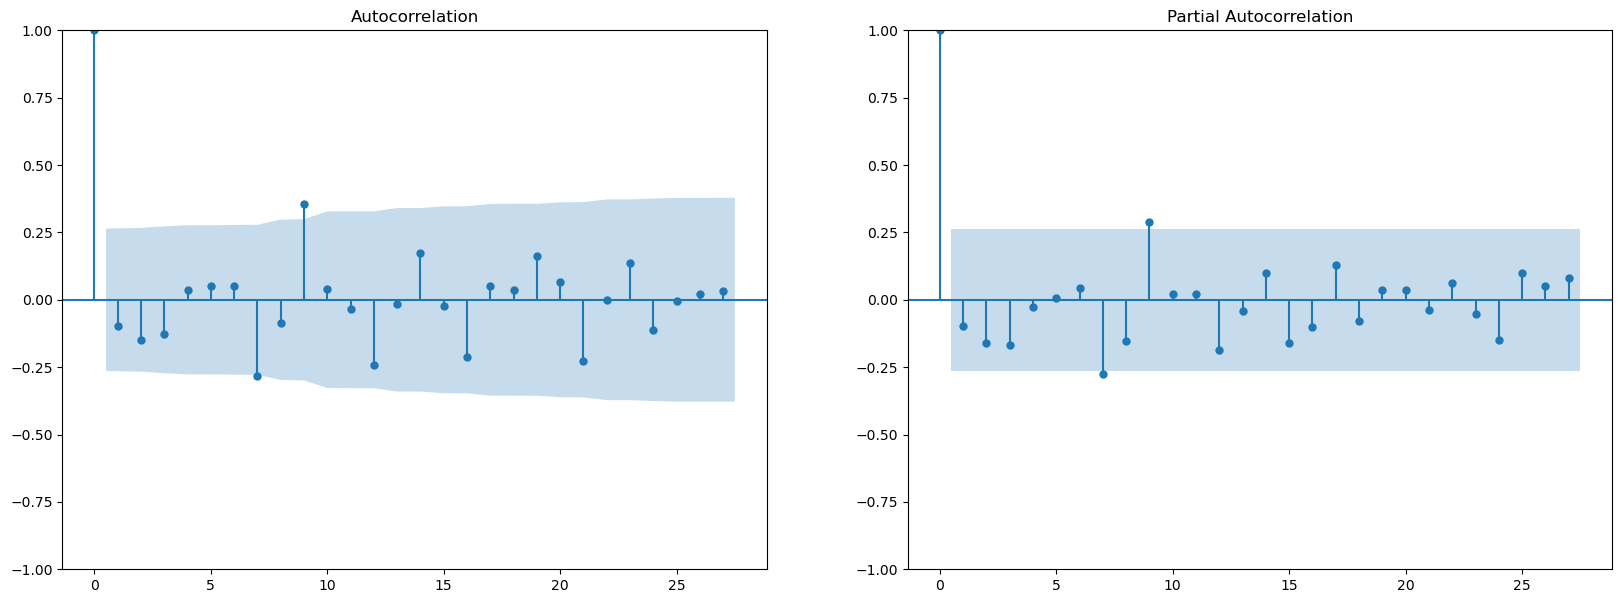

In [149]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supposons que df_filteredlog_2 est déjà défini et est une série temporelle

# Vérifie la taille de l'échantillon
n = len(df_filteredlog_2)
print(f"Taille de l'échantillon : {n}")

# Utiliser un nombre de lags inférieur à 50 % de n
max_lags = n // 2  # 50 % de la taille de l'échantillon
print(f"Nombre maximum de lags : {max_lags}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Ajuste le nombre de lags à un maximum raisonnable
plot_acf(df_filteredlog_2, lags=min(36, max_lags), ax=ax1)
plot_pacf(df_filteredlog_2, lags=min(36, max_lags), ax=ax2)

plt.show()


In [150]:
model=sm.tsa.SARIMAX(df_filteredlog,order=(1,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Life Ladder   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 111.822
Date:                         ven., 20 sept. 2024   AIC                           -215.644
Time:                                    00:51:36   BIC                           -207.614
Sample:                                         0   HQIC                          -212.539
                                             - 68                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7642      0.305      2.507      0.012       0.167       1.362
ma.L1         -0.9092      0.270   

In [151]:
model = sm.tsa.SARIMAX(df_filteredlog,order=(0,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                        Life Ladder   No. Observations:                   68
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 111.056
Date:                         ven., 20 sept. 2024   AIC                           -216.112
Time:                                    00:52:02   BIC                           -210.090
Sample:                                         0   HQIC                          -213.783
                                             - 68                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0939      0.155     -0.607      0.544      -0.397       0.209
ma.S.L12      -0.8951      0.929   

In [155]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")  # Ignorer les avertissements

# Exemple de données
y = df_western_europe['Life Ladder']

# Définir les valeurs possibles pour p, d et q
p = d = q = range(0, 3)  # Tester des valeurs de 0 à 2
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(y, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print("Meilleur modèle : ARIMA", best_pdq, "AIC:", best_aic)


Meilleur modèle : ARIMA (1, 0, 0) AIC: -38.225937418251725


In [157]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")  # Ignorer les avertissements

# Exemple de données
y = df_western_europe['Life Ladder']

# Définir les valeurs possibles pour p, d, q et P, D, Q
p = d = q = range(0, 3)  # Tester des valeurs de 0 à 2
P = D = Q = range(0, 2)  # Tester des valeurs de 0 à 1 pour les termes saisonniers
s = 12  # Saisonnalité (par exemple, mensuelle)

# Créer toutes les combinaisons de paramètres
pdq = list(itertools.product(p, d, q))
PDQ = list(itertools.product(P, D, Q))

best_aic = float('inf')
best_pdq = None
best_PDQ = None

for param in pdq:
    for param_seasonal in PDQ:
        try:
            model = SARIMAX(y, order=param, seasonal_order=param_seasonal + (s,))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_pdq = param
                best_PDQ = param_seasonal
        except:
            continue

print("Meilleur modèle : SARIMAX", best_pdq, best_PDQ, "AIC:", best_aic)


Meilleur modèle : SARIMAX (0, 1, 0) (0, 0, 0) AIC: -36.20178579672003


In [162]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Exemple de données
y = df_western_europe['Life Ladder']

# Définir les paramètres du modèle
order = (0, 1, 0)  # ARIMA(p,d,q)
seasonal_order = (0, 0, 0, 12)  # SARIMAX(P,D,Q,s)

# Ajuster le modèle SARIMAX
model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())



                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   68
Model:                SARIMAX(0, 1, 0)   Log Likelihood                  19.101
Date:              ven., 20 sept. 2024   AIC                            -36.202
Time:                         01:01:24   BIC                            -33.997
Sample:                              0   HQIC                           -35.329
                                  - 68                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0331      0.005      6.995      0.000       0.024       0.042
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 6.55
Prob(Q):                              0

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuster un modèle avec un terme AR
order = (1, 1, 0)  # Ajout d'un terme AR
seasonal_order = (0, 0, 0, 12)

model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Résumé du nouveau modèle
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   68
Model:                SARIMAX(1, 1, 0)   Log Likelihood                  19.516
Date:              ven., 20 sept. 2024   AIC                            -35.033
Time:                         01:01:27   BIC                            -30.623
Sample:                              0   HQIC                           -33.288
                                  - 68                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1108      0.122     -0.909      0.364      -0.350       0.128
sigma2         0.0327      0.005      6.500      0.000       0.023       0.043
Ljung-Box (L1) (Q):                   0.01  

In [164]:
# Ajuster un modèle avec un terme MA
order = (1, 1, 1)  # ARIMA(1, 1, 1)
seasonal_order = (0, 0, 0, 12)  # Si applicable

model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Résumé du nouveau modèle
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   68
Model:                SARIMAX(1, 1, 1)   Log Likelihood                  20.937
Date:              ven., 20 sept. 2024   AIC                            -35.874
Time:                         01:02:41   BIC                            -29.260
Sample:                              0   HQIC                           -33.257
                                  - 68                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.121      7.052      0.000       0.616       1.091
ma.L1         -0.9994      2.382     -0.420      0.675      -5.668       3.669
sigma2         0.0305      0.071      0.427 

In [169]:
df_western_europe.head()

,Life Ladder,Sub region,Synthetic Value
Year,,,
2014-01-01,6.950000,Western Europe,7.044678
2015-01-01,7.076447,Western Europe,6.942070
2016-01-01,7.048072,Western Europe,7.411886
2017-01-01,7.293728,Western Europe,7.661741
2018-01-01,7.396002,Western Europe,7.455973


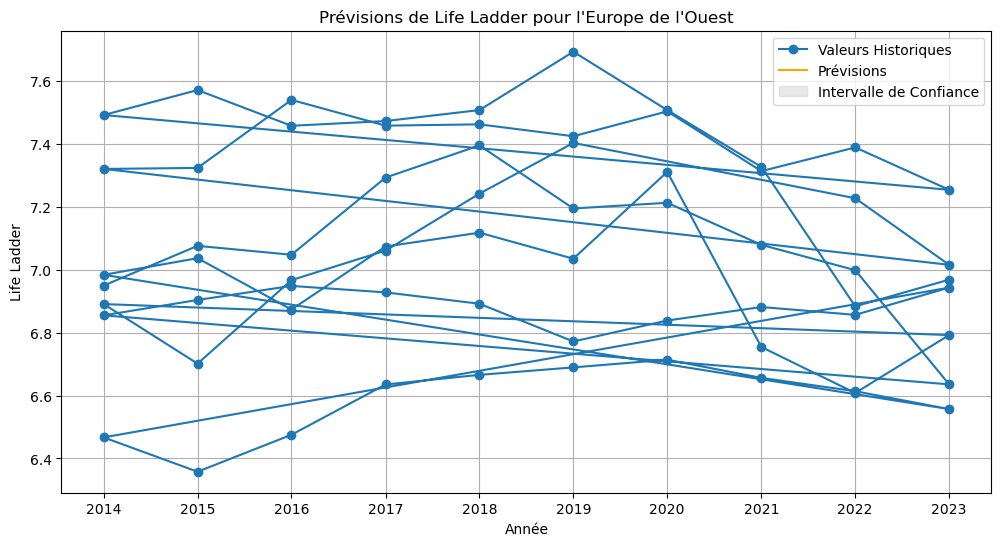

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Supposons que df_western_europe est votre DataFrame avec une colonne 'Life Ladder'
# Ajustez le modèle SARIMAX
model = SARIMAX(df_western_europe['Life Ladder'], order=(1, 1, 1))
model_fit = model.fit()

# Prédire les 10 prochaines périodes (ajustez le nombre selon vos besoins)
n_periods = 10
forecast = model_fit.get_forecast(steps=n_periods)

# Récupérer les prévisions et les intervalles de confiance
forecast_index = pd.date_range(start=df_western_europe.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='Y')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Créer un DataFrame pour les prévisions
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Predicted'])
forecast_conf_df = pd.DataFrame(forecast_conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_western_europe.index, df_western_europe['Life Ladder'], label='Valeurs Historiques', marker='o')
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Prévisions', color='orange')
plt.fill_between(forecast_conf_df.index, forecast_conf_df['Lower CI'], forecast_conf_df['Upper CI'], color='lightgrey', alpha=0.5, label='Intervalle de Confiance')
plt.title('Prévisions de Life Ladder pour l\'Europe de l\'Ouest')
plt.xlabel('Année')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid()
plt.show()


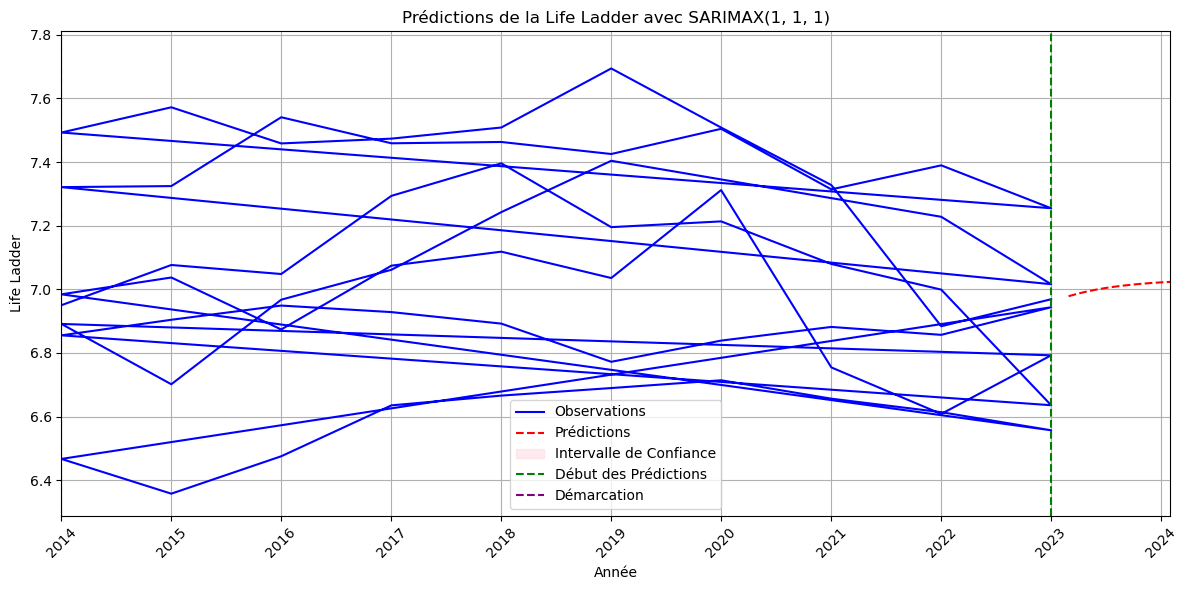

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

df_filtered = df_western_europe[df_western_europe.index >= '2014-01-01']
y = df_filtered['Life Ladder']

# Appliquer la transformation logarithmique
y_log = np.log(y)

# Ajuster le modèle SARIMAX sur les données transformées
sarima = SARIMAX(y_log, order=(1, 1, 1))
model_fit = sarima.fit()

# Effectuer des prédictions sur les 12 prochaines périodes
forecast_steps = 12
pred = model_fit.get_forecast(steps=forecast_steps)
pred_mean_log = pred.predicted_mean
pred_conf_log = pred.conf_int()

# Revenir à l'échelle originale (exponentielle)
pred_mean = np.exp(pred_mean_log)
pred_conf = np.exp(pred_conf_log)

# Créer un index de dates pour les prédictions
pred_index = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Créer une série avec les prédictions et l'index approprié
pred_series = pd.Series(pred_mean.values, index=pred_index)

# Concaténation des prédictions avec le DataFrame existant
df_western_europe_pred = pd.concat([df_filtered['Life Ladder'], pred_series], axis=0)

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_western_europe['Life Ladder'], label='Observations', color='blue')
plt.plot(pred_series, label='Prédictions', color='red', linestyle='--')
plt.fill_between(pred_conf.index, 
                 pred_conf.iloc[:, 0], 
                 pred_conf.iloc[:, 1], color='pink', alpha=0.3, label='Intervalle de Confiance')
plt.axvline(x=y.index[-1], color='green', linestyle='--', label='Début des Prédictions')

# Limiter l'axe x pour n'afficher que les années pertinentes
plt.xlim(df_filtered.index.min(), pred_index[-1])

# Tracer une ligne verticale à la démarcation
plt.axvline(x=datetime.date(2014, 1, 1), color='purple', linestyle='--', label='Démarcation')

plt.title('Prédictions de la Life Ladder avec SARIMAX(1, 1, 1)')
plt.xlabel('Année')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


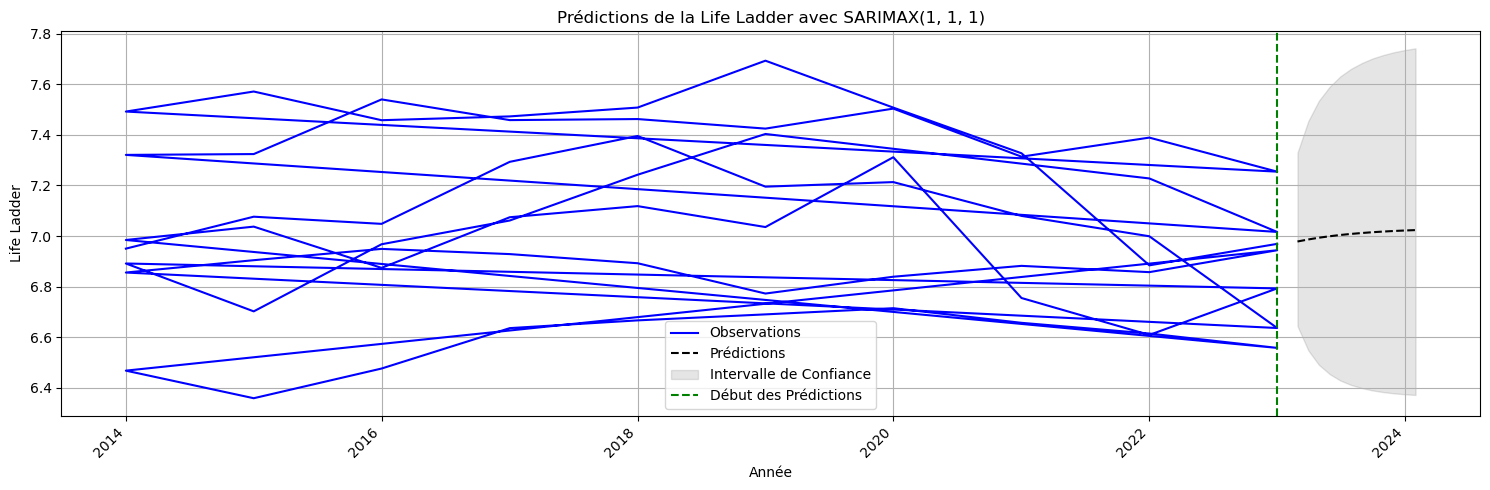

In [208]:

# Ajuster le modèle SARIMAX
sarima = SARIMAX(y_log, order=(1, 1, 1))
model_fit = sarima.fit()

# Effectuer des prédictions sur les 12 prochaines périodes
forecast_steps = 12
prediction = model_fit.get_forecast(steps=forecast_steps).summary_frame()  # Prédiction avec intervalle de confiance

# Revenir à l'échelle originale (exponentielle)
prediction = np.exp(prediction)

# Créer un index de dates pour les prédictions
pred_index = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
prediction.index = pred_index

# Visualisation
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer les observations
plt.plot(df_filtered['Life Ladder'], label='Observations', color='blue')

# Visualisation de la moyenne des prédictions
prediction['mean'].plot(ax=ax, style='k--', label='Prédictions')

# Visualisation de l'intervalle de confiance
ax.fill_between(prediction.index, 
                prediction['mean_ci_lower'], 
                prediction['mean_ci_upper'], 
                color='k', alpha=0.1, label='Intervalle de Confiance')

# Ligne de démarcation
plt.axvline(x=df_filtered.index[-1], color='green', linestyle='--', label='Début des Prédictions')

# Titres et légende
plt.title('Prédictions de la Life Ladder avec SARIMAX(1, 1, 1)')
plt.xlabel('Année')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Refaire avec un pays : France


In [180]:
df_2024

,Country name,Region,Sub region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Year,,,,,,,,,,,,
2014,Afghanistan,Asia,Southern Asia,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
2015,Afghanistan,Asia,Southern Asia,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
2016,Afghanistan,Asia,Southern Asia,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
2017,Afghanistan,Asia,Southern Asia,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326
2018,Afghanistan,Asia,Southern Asia,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,0.384561,0.404904
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Zimbabwe,Africa,Sub-Saharan Africa,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2020,Zimbabwe,Africa,Sub-Saharan Africa,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2021,Zimbabwe,Africa,Sub-Saharan Africa,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682


In [182]:
# Filtrer le DataFrame pour ne garder que les lignes où 'Country Name' est 'France'
df_france = df_2024[df_2024['Country name'] == 'France'][['Life Ladder']]

# Afficher les premières lignes du DataFrame filtré
print(df_france.head())


      Life Ladder
Year             
2014     6.466868
2015     6.357625
2016     6.475209
2017     6.635222
2018     6.665904


In [183]:
# Calculer la médiane de 'Life Ladder' pour la France
median_life_ladder_france = df_france['Life Ladder'].median()

# Affichage des résultats
print("Médiane de 'Life Ladder' pour la France :", median_life_ladder_france)
print("\nDonnées pour la France :")
print(df_france.head())

Médiane de 'Life Ladder' pour la France : 6.624514579772949

Données pour la France :
      Life Ladder
Year             
2014     6.466868
2015     6.357625
2016     6.475209
2017     6.635222
2018     6.665904


Médiane de 'Life Ladder' pour la France : 6.624514579772949

Données pour la France :
      Life Ladder
Year             
2014     6.466868
2015     6.357625
2016     6.475209
2017     6.635222
2018     6.665904


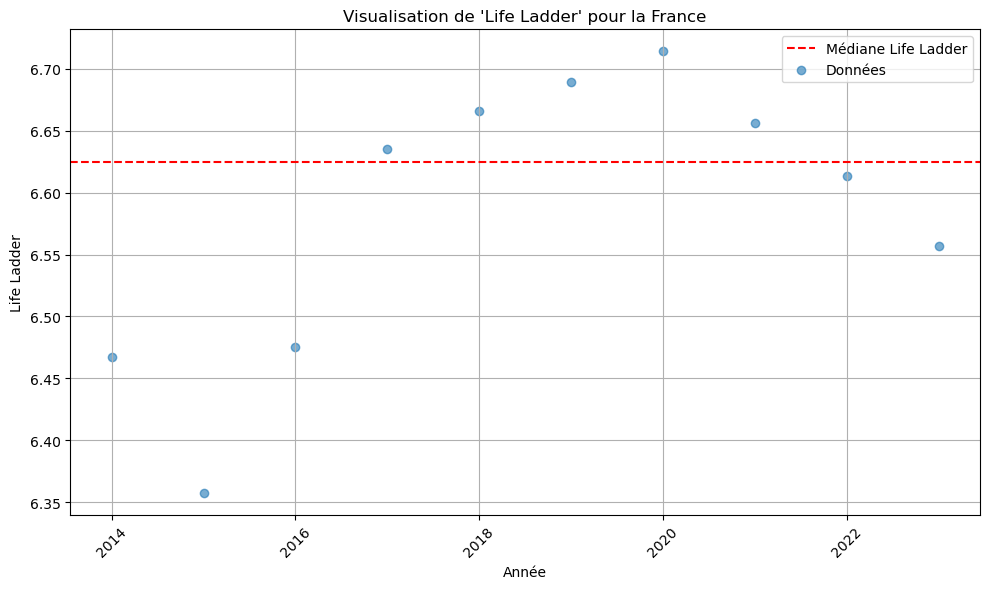

In [236]:
import matplotlib.pyplot as plt

# Filtrer le DataFrame pour ne garder que les données de la France
df_france = df_2024[df_2024['Country name'] == 'France'][['Life Ladder']]

# Calculer la médiane de 'Life Ladder' pour la France
median_life_ladder_france = df_france['Life Ladder'].median()

# Affichage des résultats
print("Médiane de 'Life Ladder' pour la France :", median_life_ladder_france)
print("\nDonnées pour la France :")
print(df_france.head())

# Création d'un tracé pour visualiser la médiane
plt.figure(figsize=(10, 6))
plt.axhline(y=median_life_ladder_france, color='r', linestyle='--', label='Médiane Life Ladder')
plt.scatter(df_france.index, df_france['Life Ladder'], label='Données', alpha=0.6)

plt.title("Visualisation de 'Life Ladder' pour la France")
plt.xlabel("Année")
plt.ylabel("Life Ladder")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


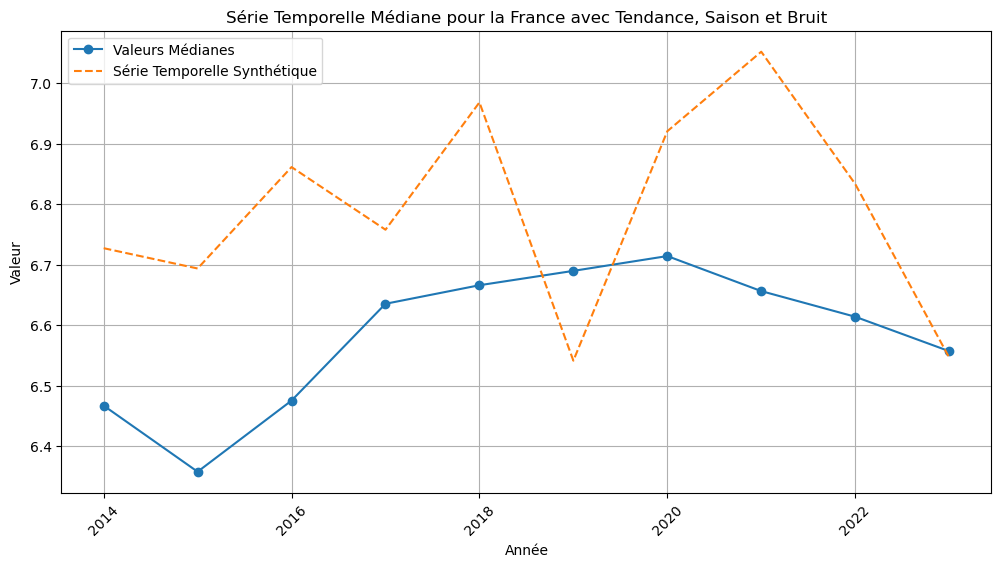

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer le DataFrame pour ne garder que les données de la France
df_france = df_2024[df_2024['Country name'] == 'France'][['Life Ladder']]

# Définir les paramètres pour tendance, saisonnalité et bruit
trend_slope = 0.02  # Pente de la tendance
seasonal_amplitude = 0.5  # Amplitude de la saisonnalité
seasonal_period = 2  # Période de la saisonnalité
noise_std = 0.2  # Écart type du bruit

# Extraire les valeurs de 'Life Ladder'
values = df_france['Life Ladder'].values

# Générer la tendance
trend = trend_slope * np.arange(len(values))

# Générer la saisonnalité
seasonal = seasonal_amplitude * np.sin(2 * np.pi * np.arange(len(values)) / seasonal_period)

# Générer le bruit
noise = np.random.normal(scale=noise_std, size=len(values))

# Ajouter des composantes à la série médiane
df_france['Synthetic Value'] = values + trend + seasonal + noise

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df_france.index, df_france['Life Ladder'], label='Valeurs Médianes', marker='o')
plt.plot(df_france.index, df_france['Synthetic Value'], label='Série Temporelle Synthétique', linestyle='--')
plt.title('Série Temporelle Médiane pour la France avec Tendance, Saison et Bruit')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


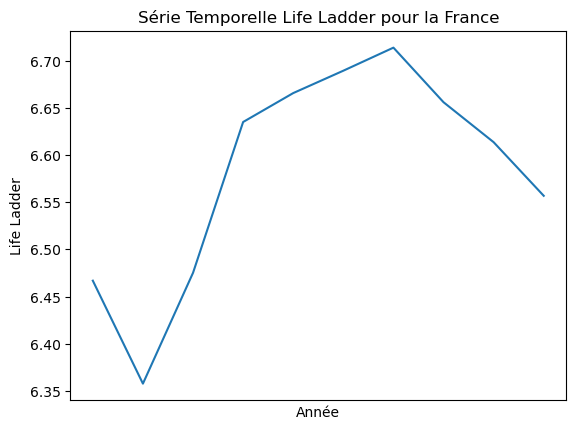

In [199]:
plt.plot(df_france['Life Ladder'])
plt.title('Série Temporelle Life Ladder pour la France')
plt.xlabel('Année')
plt.ylabel('Life Ladder')
plt.xticks(rotation=45)
plt.show()


In [237]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Extraire la colonne d'intérêt
data_fr = df_france['Life Ladder']

# Test ADF
adf_result = adfuller(data_fr)
print('Test ADF:')
print(f'Statistique : {adf_result[0]}')
print(f'p-valeur : {adf_result[1]}')

# Test KPSS
kpss_result = kpss(data_fr)
print('\nTest KPSS:')
print(f'Statistique : {kpss_result[0]}')
print(f'p-valeur : {kpss_result[1]}')

Test ADF:
Statistique : -1.1144234687296943
p-valeur : 0.709285852016379

Test KPSS:
Statistique : 0.31368003633345765
p-valeur : 0.1


1. Test ADF (Augmented Dickey-Fuller)
- Statistique : -1.1144
- p-valeur : 0.7093

Interprétation :
- L'hypothèse nulle du test ADF stipule que la série est non stationnaire (elle contient une racine unitaire).
- Avec une p-valeur de 0.7093, qui est bien supérieure au seuil commun de 0.05, nous ne pouvons pas rejeter l'hypothèse nulle. Cela signifie que nous n'avons pas de preuves suffisantes pour affirmer que la série est stationnaire.

2. Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
- Statistique : 0.3137
- p-valeur : 0.1

Interprétation :
-L'hypothèse nulle du test KPSS stipule que la série est stationnaire.
-Une p-valeur de 0.1 indique que nous ne pouvons pas rejeter l'hypothèse nulle à un niveau de signification de 0.05. Cela suggère que la série pourrait être stationnaire.

Décomposition de la série temporelle. La décomposition permet d'observer les tendances, la saisonnalité et les résidus.

<Figure size 1200x800 with 0 Axes>

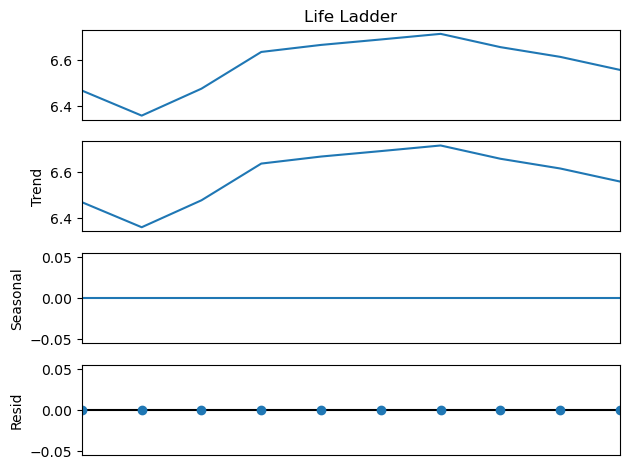

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assurez-vous que l'index de df_france est un DatetimeIndex
df_france.index = pd.to_datetime(df_france.index)

# Décomposition de la série temporelle 'Life Ladder'
decomposition = seasonal_decompose(df_france['Life Ladder'], model='additive', period=1)

# Visualisation de la décomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


In [212]:
print(df_france['Life Ladder'].isnull().sum())


0


In [242]:
df_france.reset_index(inplace=True)  # Réinitialise l'index
df_france.loc[:,'Year'] = pd.to_datetime(df_france['Year'])  # Convertir en Datetime
df_france.set_index('Year', inplace=True)  # Redéfinir comme index


In [243]:
print(data.index)
print(data.index[:10])  # Affiche les 10 premières dates de l'index
print(type(data.index))

DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)
DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


ValueError: could not broadcast input array from shape (10,) into shape (21,)

<Figure size 1200x600 with 0 Axes>

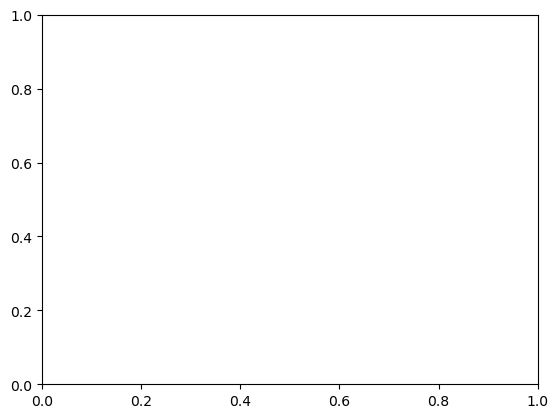

In [215]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extraire les données
data = df_france['Life Ladder'].dropna()

# Tracer ACF
plt.figure(figsize=(12, 6))
plot_acf(data, lags=20)
plt.title('Fonction d\'Autocorrélation (ACF) pour la France')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation')
plt.grid(True)
plt.show()

# Tracer PACF
plt.figure(figsize=(12, 6))
plot_pacf(data, lags=20)
plt.title('Fonction d\'Autocorrélation Partielle (PACF) pour la France')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation Partielle')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

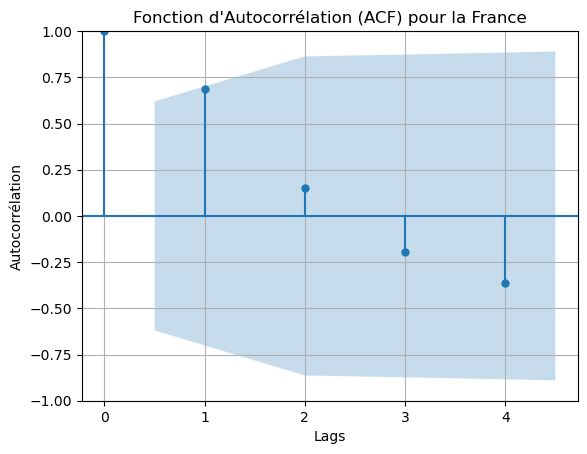

<Figure size 1200x600 with 0 Axes>

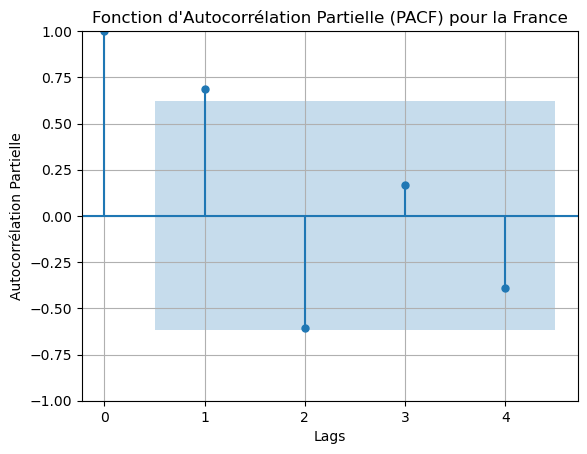

In [218]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Nombre de lags à utiliser (doit être inférieur à 50% de la taille de l'échantillon)
max_lags = min(4, len(df_france['Life Ladder'].dropna()) - 1)

# Tracer ACF
plt.figure(figsize=(12, 6))
plot_acf(df_france['Life Ladder'].dropna(), lags=max_lags)
plt.title('Fonction d\'Autocorrélation (ACF) pour la France')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation')
plt.grid(True)
plt.show()

# Tracer PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_france['Life Ladder'].dropna(), lags=max_lags)
plt.title('Fonction d\'Autocorrélation Partielle (PACF) pour la France')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation Partielle')
plt.grid(True)
plt.show()


In [219]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Supposons que df_france soit déjà défini avec une colonne 'Life Ladder'
data = df_france['Life Ladder']

# Construire et ajuster le modèle ARIMA avec les paramètres (p=1, d=0, q=1)
model = ARIMA(data, order=(1, 0, 1))
model_fit = model.fit()

# Résumé du modèle ajusté
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   10
Model:                  ARIMA(1, 0, 1)   Log Likelihood                  13.515
Date:              ven., 20 sept. 2024   AIC                            -19.030
Time:                         02:13:31   BIC                            -17.820
Sample:                              0   HQIC                           -20.358
                                  - 10                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5735      0.079     82.729      0.000       6.418       6.729
ar.L1          0.4734      0.380      1.246      0.213      -0.272       1.218
ma.L1          0.9998   1086.171      0.001 

Amelioration


                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   10
Model:                  ARIMA(1, 1, 1)   Log Likelihood                  11.049
Date:              ven., 20 sept. 2024   AIC                            -16.098
Time:                         02:15:30   BIC                            -15.507
Sample:                              0   HQIC                           -17.375
                                  - 10                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0188      0.954      0.020      0.984      -1.850       1.888
ma.L1          0.9764      8.650      0.113      0.910     -15.978      17.930
sigma2         0.0040      0.033      0.120 

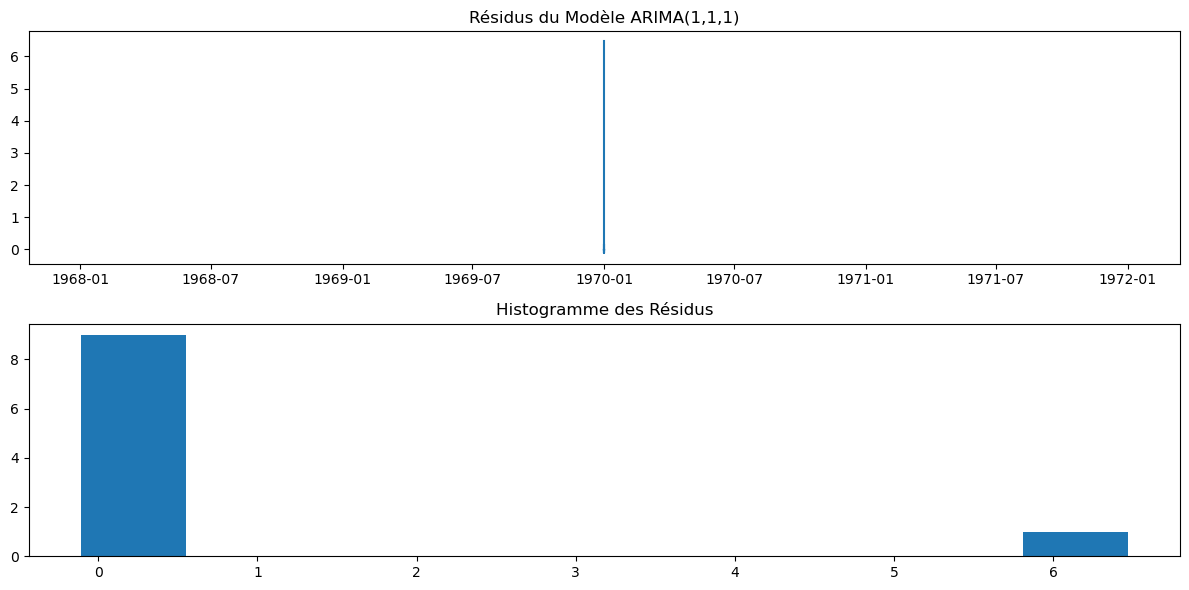

In [221]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Supposons que df_france soit déjà défini
data = df_france['Life Ladder']

# Essayer un modèle ARIMA avec d=1 (différenciation)
model_diff = ARIMA(data, order=(1, 1, 1))
model_fit_diff = model_diff.fit()

# Résumé du modèle ajusté
print(model_fit_diff.summary())

# Visualisation des résidus
residuals = model_fit_diff.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Résidus du Modèle ARIMA(1,1,1)')
plt.subplot(212)
plt.hist(residuals, bins=10)
plt.title('Histogramme des Résidus')
plt.tight_layout()
plt.show()


In [222]:

# Essayer un modèle avec différents ordres
best_aic = np.inf
best_order = None
best_model = None

for p in range(3):  # Tester p=0, 1, 2
    for q in range(3):  # Tester q=0, 1, 2
        try:
            model = ARIMA(data, order=(p, 1, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, 1, q)
                best_model = model_fit
        except:
            continue

print(f'Meilleur modèle: ARIMA{best_order} avec AIC={best_aic}')

# Résumé du meilleur modèle
print(best_model.summary())


Meilleur modèle: ARIMA(0, 1, 1) avec AIC=-18.09568238484537
                                SARIMAX Results                                
Dep. Variable:             Life Ladder   No. Observations:                   10
Model:                  ARIMA(0, 1, 1)   Log Likelihood                  11.048
Date:              ven., 20 sept. 2024   AIC                            -18.096
Time:                         02:15:35   BIC                            -17.701
Sample:                              0   HQIC                           -18.947
                                  - 10                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9675      6.122      0.158      0.874     -11.032      12.967
sigma2         0.0040      0.023      0.174      0.862      -0.

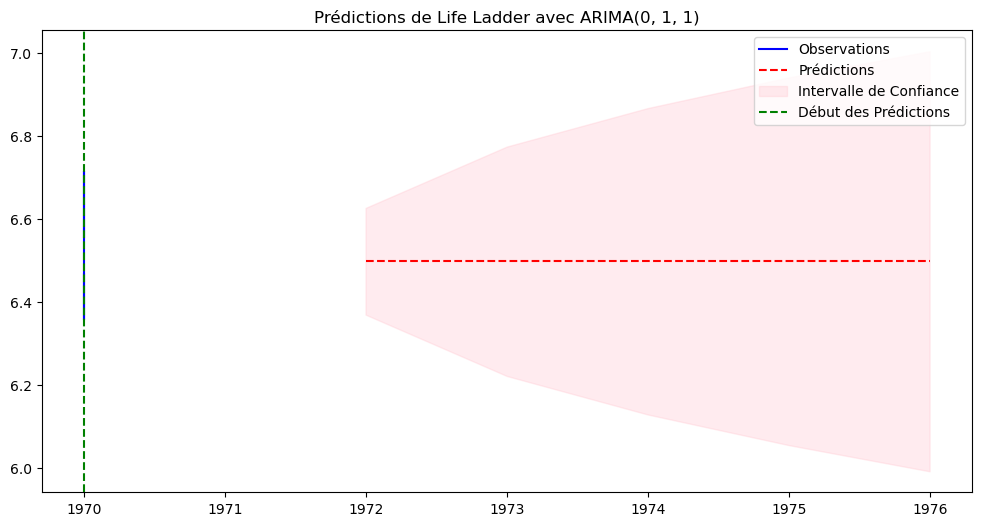

In [223]:
# Prédire les prochaines 5 valeurs
forecast = best_model.get_forecast(steps=5)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Observations', color='blue')
plt.plot(forecast_index, forecast_mean, label='Prédictions', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='pink', alpha=0.3, label='Intervalle de Confiance')
plt.axvline(x=data.index[-1], color='green', linestyle='--', label='Début des Prédictions')
plt.title('Prédictions de Life Ladder avec ARIMA(0, 1, 1)')
plt.legend()
plt.show()


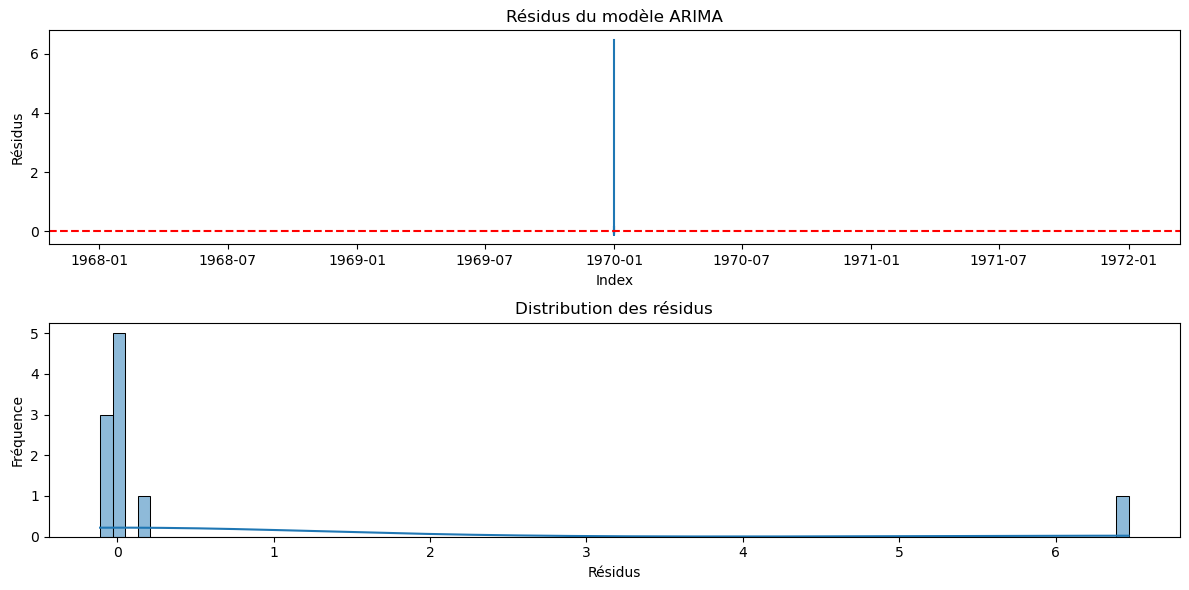

In [224]:

# Supposons que 'data' soit votre série temporelle de la France
model = ARIMA(data, order=(0, 1, 1))
model_fit = model.fit()

# Extraire les résidus
residuals = model_fit.resid

# Tracer les résidus
plt.figure(figsize=(12, 6))

# Premier sous-graphique : Résidus
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Résidus du modèle ARIMA')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Résidus')

# Deuxième sous-graphique : Distribution des résidus
plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

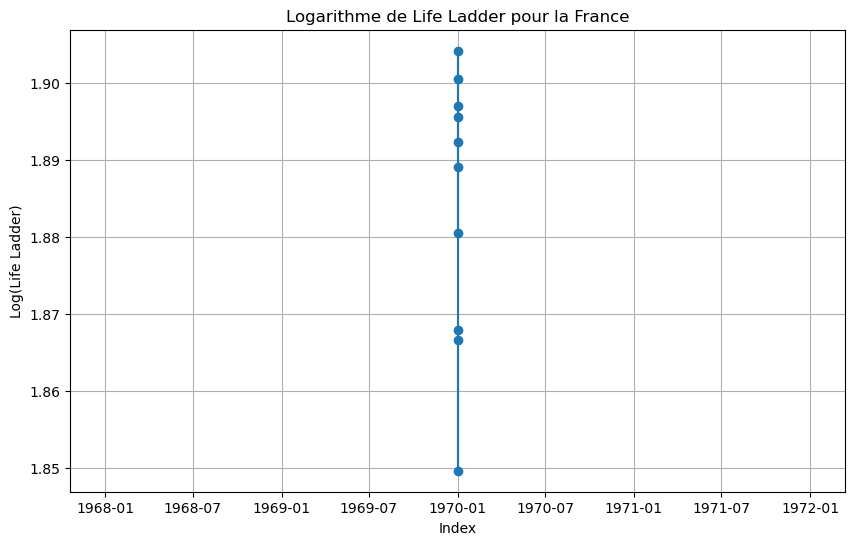

In [226]:
# Assurez-vous que df_france est déjà défini
df_france['Life Ladder'] = pd.to_numeric(df_france['Life Ladder'], errors='coerce')

# Appliquer le logarithme
df_filteredlog_france = np.log(df_france['Life Ladder'])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df_filteredlog_france, marker='o')
plt.title('Logarithme de Life Ladder pour la France')
plt.xlabel('Index')
plt.ylabel('Log(Life Ladder)')
plt.grid()
plt.show()

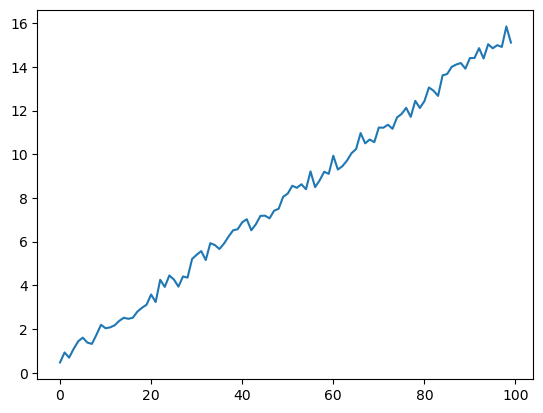

In [227]:
epsilon = np.random.rand(100) #Bruit Blanc
t  = np.linspace(0,10,100) # Temps
alpha = 1.5 #coefficient de tendance
total = pd.DataFrame(alpha * t + epsilon)
plt.plot(total);

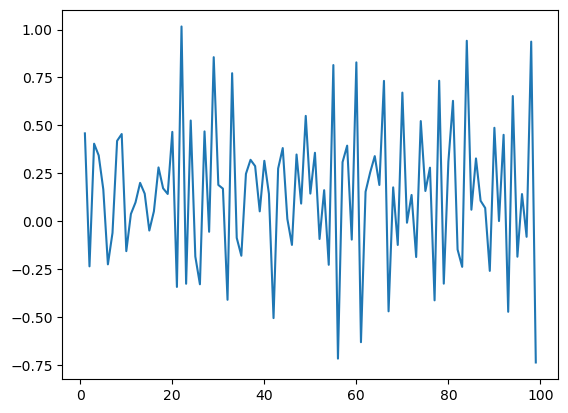

In [229]:
total_diff = total.diff().dropna() #différenciation
plt.plot(total_diff);

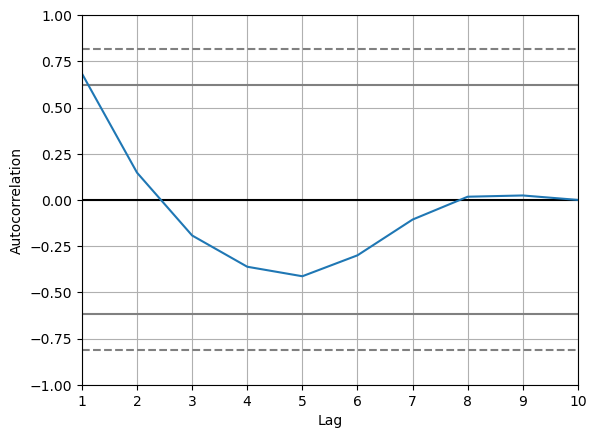

In [230]:
pd.plotting.autocorrelation_plot(df_filteredlog_france);

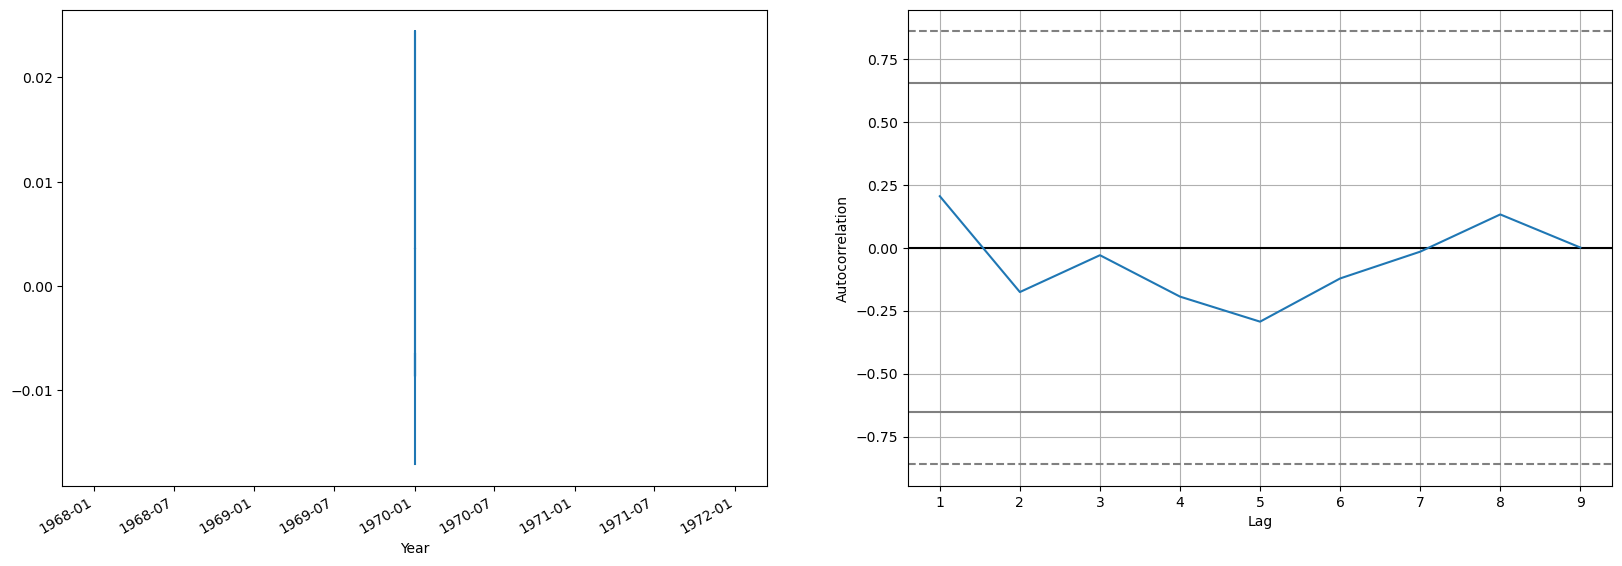

In [231]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Création de la figure et des axes

df_filteredlog_france_1 = df_filteredlog_france.diff().dropna() # Différenciation ordre 1

df_filteredlog_france_1.plot(ax = ax1) #Série temporelle différenciée

pd.plotting.autocorrelation_plot(df_filteredlog_france_1, ax = ax2); #Autocorrélogramme de la série différenciée

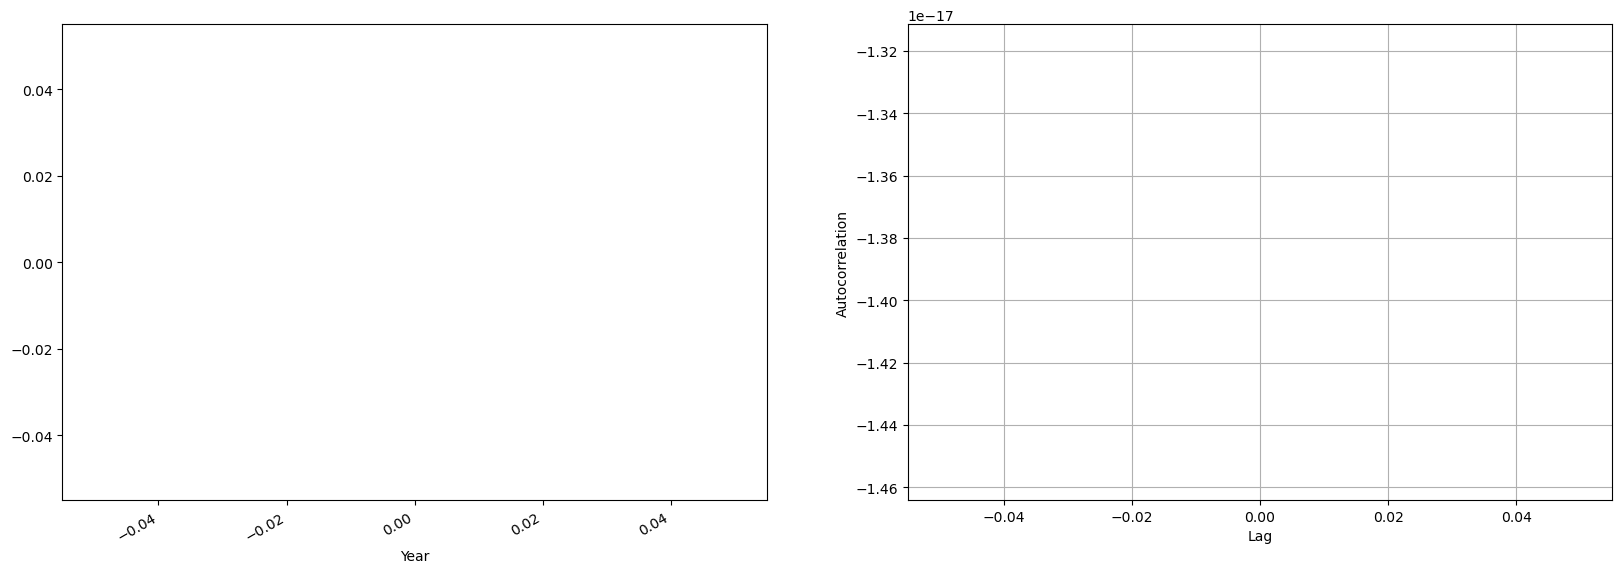

In [233]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) #Création de la figure et des axes

df_filteredlog_france_2 = df_filteredlog_france_1.diff(periods = 12).dropna() #Différenciation d'ordre 12

df_filteredlog_france_2.plot(ax = ax1) #Série doublement différenciée

pd.plotting.autocorrelation_plot(df_filteredlog_france_2, ax = ax2); #Autocorrélogramme de la série

In [234]:
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(df_filteredlog_france_2)
p_value  # p-valeur de 0,1% on peut considérer la série comme stationnaire.

ValueError: zero-size array to reduction operation maximum which has no identity